
<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=141BJVwtPjNAL1F8yasImXWT9JA3ZjszY" width="500"><br><br>
  <img src="https://drive.google.com/uc?export=view&id=1Kxqq1-kCQb2xC0WDAchliOa4oVO24bc_" width="400">

<br>
<font color="5acfee" size="6">پاسخ مینی پروژه سوم یادگیری ماشین</font><br>
<font color="fc3232" size="6">بخش های 1.1 و 1.2</font><br>
<font color="5acfee" size="5">نگارش: علی شعبانپور مقدم - هدیه شوشیان</font><br>
<font color="5acfee" size="5">شماره دانشجویی: 40207304-40308054</font><br>
<font color="5acfee" size="5">استاد درس: دکتر مهدی علیاری شوره دلی</font><br>
<font color="5acfee" size="5">بهار 1404</font>

</div>

##1.1

In [ ]:
# نصب کتابخانه مورد نیاز
!pip install ucimlrepo imbalanced-learn

# --- ایمپورت کتابخانه‌ها ---
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import minimize


📌 Indices of Support Vectors (1-based): [1 2 3 4 5]
📌 Alphas: [5.05770117e+19 3.03462070e+20 4.55193106e+20 1.01154023e+20
 3.03462070e+20]
📌 Weight vector w: [-262144.       0. -131072.]
📌 Bias b: 393215.0

✅ Hyperplane Equation:
  -262144.00·x₁ + 0.00·x₂ - 131072.00·x₃ + 393215.00 = 0


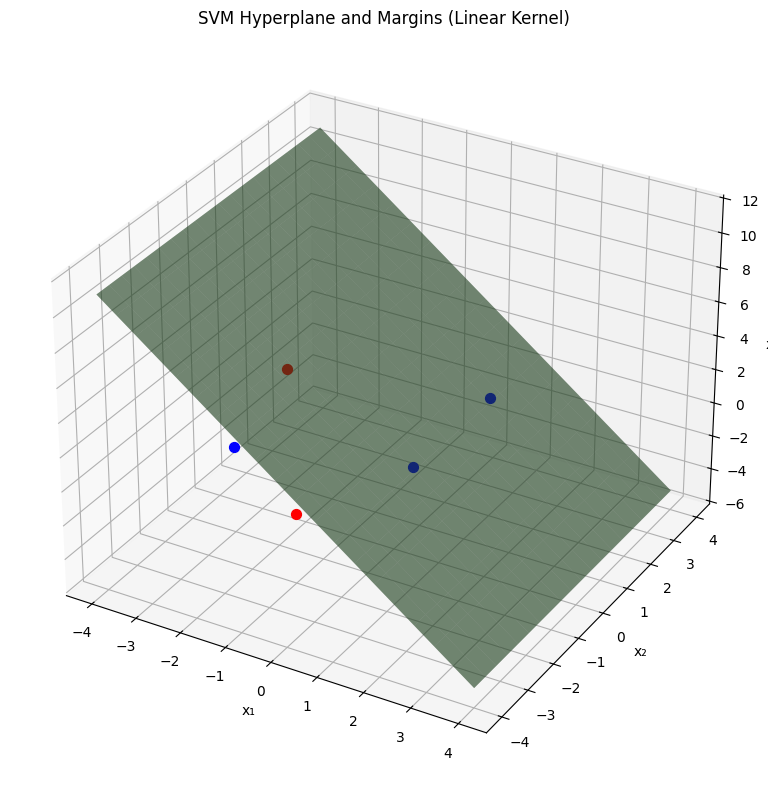

In [ ]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# داده‌ها
X = np.array([
    [1, -1, 1],
    [-3, 1, 1],
    [-3, -1, -1],
    [1, 2, 1],
    [-1, -2, -2]
])
y = np.array([-1, 1, -1, -1, 1])
N = len(y)

# محاسبه ماتریس کرنل خطی
K = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        K[i, j] = np.dot(X[i], X[j])

# ماتریس H برای QP
H = np.outer(y, y) * K

# تعریف QP
P = matrix(H)
q = matrix(-np.ones(N))
A = matrix(y, (1, N), 'd')
b_cvx = matrix(0.0)
G = matrix(-np.eye(N))
h = matrix(np.zeros(N))

# حل QP
solvers.options['show_progress'] = False
solution = solvers.qp(P, q, G, h, A, b_cvx)
alphas = np.array(solution['x']).flatten()

# پیدا کردن بردارهای پشتیبان
support_vectors = np.where(alphas > 1e-5)[0]

# محاسبه w
w = np.sum(alphas[:, None] * y[:, None] * X, axis=0)

# محاسبه b با استفاده از اولین بردار پشتیبان
sv_idx = support_vectors[0]
b = y[sv_idx] - np.dot(w, X[sv_idx])

# چاپ نتایج
print("📌 Indices of Support Vectors (1-based):", support_vectors + 1)
print("📌 Alphas:", alphas)
print("📌 Weight vector w:", w)
print("📌 Bias b:", b)

# معادله صفحه جداکننده
print("\n✅ Hyperplane Equation:")
print(f"  {w[0]:.2f}·x₁ {'+' if w[1] >= 0 else '-'} {abs(w[1]):.2f}·x₂ {'+' if w[2] >= 0 else '-'} {abs(w[2]):.2f}·x₃ {'+' if b >= 0 else '-'} {abs(b):.2f} = 0")

# تابع تصمیم برای رسم صفحه‌ها
def decision_function(x, y, w, b, offset=0):
    return (-w[0]*x - w[1]*y - b + offset) / w[2]

# ساخت mesh برای ترسیم
xx, yy = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20))
zz_main = decision_function(xx, yy, w, b, 0)
zz_plus = decision_function(xx, yy, w, b, 1)
zz_minus = decision_function(xx, yy, w, b, -1)

# رسم نمودار 3 بعدی
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# ترسیم نقاط داده
for i in range(N):
    color = 'r' if y[i] == 1 else 'b'
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], color=color, s=50)

# ترسیم صفحه‌ها
ax.plot_surface(xx, yy, zz_main, alpha=0.4, color='green')   # صفحه اصلی
ax.plot_surface(xx, yy, zz_plus, alpha=0.2, color='gray')    # حاشیه مثبت
ax.plot_surface(xx, yy, zz_minus, alpha=0.2, color='gray')   # حاشیه منفی

# تنظیمات محور
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("x₃")
ax.set_title("SVM Hyperplane and Margins (Linear Kernel)")
plt.tight_layout()
plt.show()


##1.2.1  & 1.2.2

In [ ]:
import pandas as pd
import urllib.request

# آدرس فایل CSV دیتاست
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"

# نام فایل برای ذخیره محلی
filename = "PRSA_data_2010.1.1-2014.12.31.csv"

# دانلود فایل CSV (اگر قبلاً دانلود نشده باشد)
try:
    with open(filename, 'r') as f:
        print(f"File '{filename}' already exists locally.")
except FileNotFoundError:
    print(f"Downloading {filename} ...")
    urllib.request.urlretrieve(url, filename)
    print("Download complete.")

# بارگذاری فایل CSV با pandas
df = pd.read_csv(filename)

# نمایش چند سطر اول دیتاست
print(df.head())

# اگر بخوای می‌تونی ویژگی‌ها و هدف رو از این DataFrame استخراج کنی
# مثلا فرض کنیم هدف متغیر "pm2.5" هست
X = df.drop(columns=['pm2.5'])  # ویژگی‌ها
y = df['pm2.5']                 # هدف

print("\nFeatures sample:")
print(X.head())

print("\nTarget sample:")
print(y.head())


File 'PRSA_data_2010.1.1-2014.12.31.csv' already exists locally.
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

Features sample:
   No  year  month  day  hour  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4   -20 -12.0  1018.0   NW  12.97   0   0

Target sample:
0   NaN
1   NaN
2  

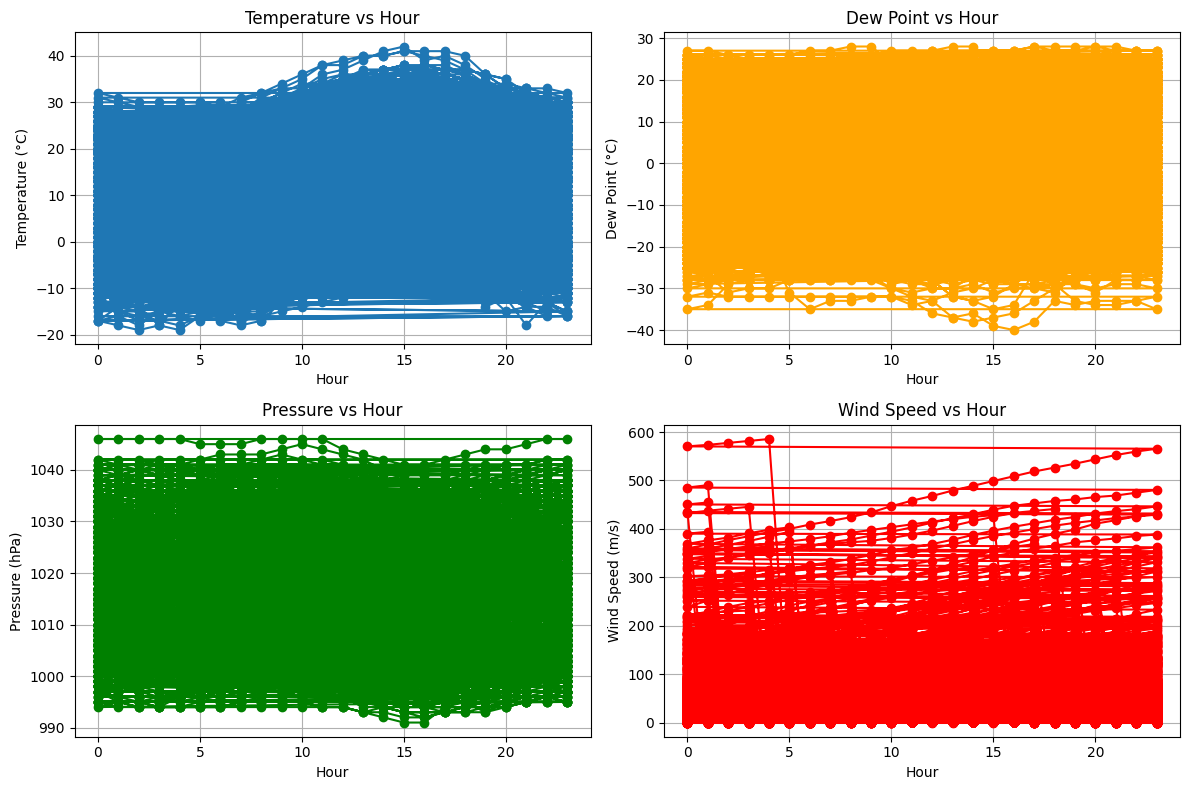

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df['hour'], df['TEMP'], marker='o', label='Temperature (°C)')
plt.title('Temperature vs Hour')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df['hour'], df['DEWP'], marker='o', label='Dew Point (°C)', color='orange')
plt.title('Dew Point vs Hour')
plt.xlabel('Hour')
plt.ylabel('Dew Point (°C)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df['hour'], df['PRES'], marker='o', label='Pressure (hPa)', color='green')
plt.title('Pressure vs Hour')
plt.xlabel('Hour')
plt.ylabel('Pressure (hPa)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df['hour'], df['Iws'], marker='o', label='Wind Speed (m/s)', color='red')
plt.title('Wind Speed vs Hour')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

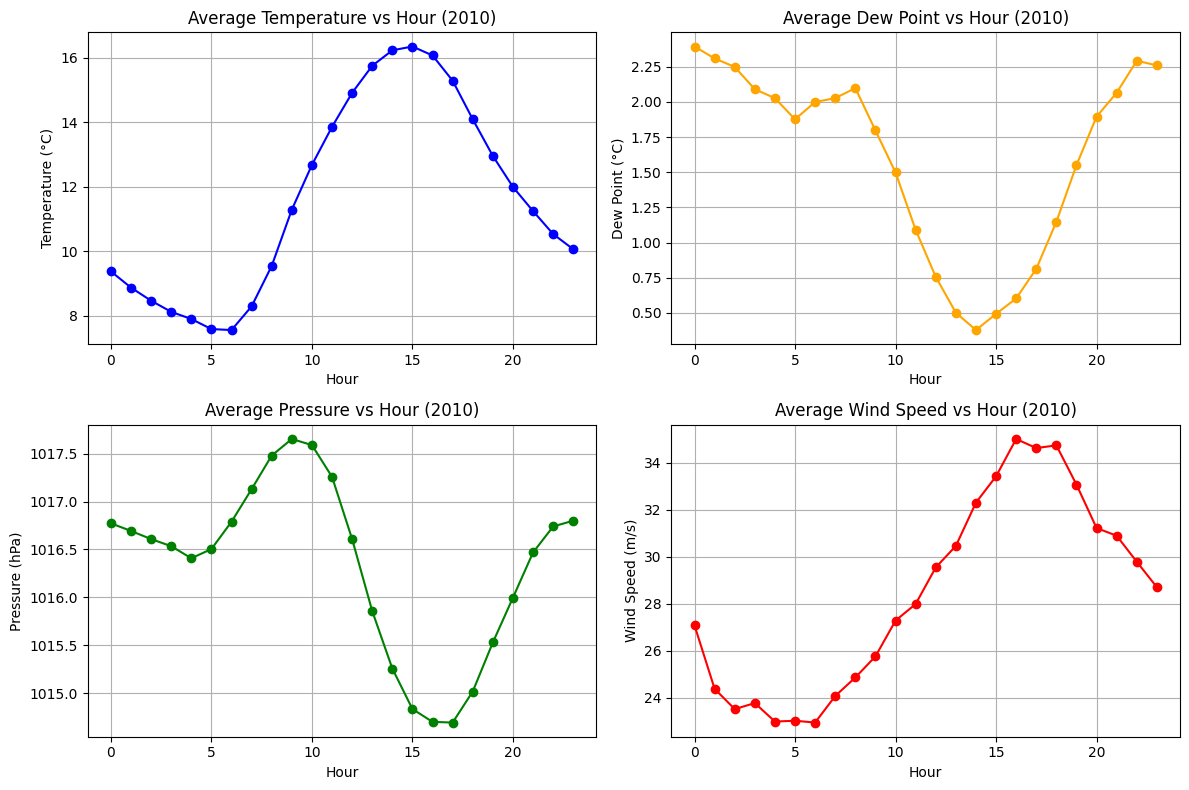

In [ ]:
df_2010 = df[df['year'] == 2010].copy()


df_2010_mean = df_2010.groupby('hour')[['TEMP', 'DEWP', 'PRES', 'Iws']].mean().reset_index()

plt.figure(figsize=(12, 8))

# دما (Temperature)
plt.subplot(2, 2, 1)
plt.plot(df_2010_mean['hour'], df_2010_mean['TEMP'], marker='o', label='Temperature (°C)', color='blue')
plt.title('Average Temperature vs Hour (2010)')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# نقطه شبنم (Dew Point)
plt.subplot(2, 2, 2)
plt.plot(df_2010_mean['hour'], df_2010_mean['DEWP'], marker='o', label='Dew Point (°C)', color='orange')
plt.title('Average Dew Point vs Hour (2010)')
plt.xlabel('Hour')
plt.ylabel('Dew Point (°C)')
plt.grid(True)

# فشار اتمسفری (Pressure)
plt.subplot(2, 2, 3)
plt.plot(df_2010_mean['hour'], df_2010_mean['PRES'], marker='o', label='Pressure (hPa)', color='green')
plt.title('Average Pressure vs Hour (2010)')
plt.xlabel('Hour')
plt.ylabel('Pressure (hPa)')
plt.grid(True)

# سرعت باد (Wind Speed)
plt.subplot(2, 2, 4)
plt.plot(df_2010_mean['hour'], df_2010_mean['Iws'], marker='o', label='Wind Speed (m/s)', color='red')
plt.title('Average Wind Speed vs Hour (2010)')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import urllib.request

# آدرس فایل CSV دیتاست
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
filename = "PRSA_data_2010.1.1-2014.12.31.csv"

# دانلود فایل CSV در صورت عدم وجود
try:
    with open(filename, 'r'):
        print(f"File '{filename}' already exists locally.")
except FileNotFoundError:
    print(f"Downloading {filename} ...")
    urllib.request.urlretrieve(url, filename)
    print("Download complete.")

# بارگذاری داده‌ها
df = pd.read_csv(filename)

# اطلاعات کلی متادیتا به صورت پویا از داده استخراج می‌کنیم
metadata = {
    'name': 'Beijing PM2.5',
    'num_instances': df.shape[0],
    'num_features': df.shape[1] - 1,  # بدون در نظر گرفتن هدف
    'target_col': ['pm2.5'],
    'has_missing_values': 'yes' if df.isnull().values.any() else 'no',
    'missing_values_count': df.isnull().sum().sum(),
    'feature_types': list(df.drop(columns=['pm2.5']).dtypes.astype(str).unique()),
    'date_range': f"{df[['year', 'month', 'day']].drop_duplicates().sort_values(['year','month','day']).iloc[0].to_dict()} to {df[['year', 'month', 'day']].drop_duplicates().sort_values(['year','month','day']).iloc[-1].to_dict()}"
}

# ساخت جدول متغیرها بر اساس داده‌ها
variables_list = []
for col in df.columns:
    if col == 'pm2.5':
        role = 'Target'
    elif col in ['No']:
        role = 'ID'
    else:
        role = 'Feature'

    # تعیین نوع داده به شکل ساده‌تر
    dtype = str(df[col].dtype)
    if dtype.startswith('int'):
        type_ = 'Integer'
    elif dtype.startswith('float'):
        type_ = 'Real'
    elif dtype == 'object':
        type_ = 'Categorical'
    else:
        type_ = dtype

    missing = 'yes' if df[col].isnull().any() else 'no'
    variables_list.append({
        'name': col,
        'role': role,
        'type': type_,
        'missing_values': missing
    })

variables = pd.DataFrame(variables_list)

# ساخت ستون datetime
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])

# نمایش متادیتا
print("=== Dataset Metadata (extracted) ===")
for k,v in metadata.items():
    print(f"{k}: {v}")

print("\n=== Variables Summary ===")
print(variables)

print("\n=== Sample Data with datetime ===")
print(df[['datetime', 'pm2.5']].head())


File 'PRSA_data_2010.1.1-2014.12.31.csv' already exists locally.
=== Dataset Metadata (extracted) ===
name: Beijing PM2.5
num_instances: 43824
num_features: 12
target_col: ['pm2.5']
has_missing_values: yes
missing_values_count: 2067
feature_types: ['int64', 'float64', 'object']
date_range: {'year': 2010, 'month': 1, 'day': 1} to {'year': 2014, 'month': 12, 'day': 31}

=== Variables Summary ===
     name     role         type missing_values
0      No       ID      Integer             no
1    year  Feature      Integer             no
2   month  Feature      Integer             no
3     day  Feature      Integer             no
4    hour  Feature      Integer             no
5   pm2.5   Target         Real            yes
6    DEWP  Feature      Integer             no
7    TEMP  Feature         Real             no
8    PRES  Feature         Real             no
9    cbwd  Feature  Categorical             no
10    Iws  Feature         Real             no
11     Is  Feature      Integer        

File 'PRSA_data_2010.1.1-2014.12.31.csv' already exists locally.
             datetime  pm2.5
0 2010-01-01 00:00:00    NaN
1 2010-01-01 01:00:00    NaN
2 2010-01-01 02:00:00    NaN
3 2010-01-01 03:00:00    NaN
4 2010-01-01 04:00:00    NaN


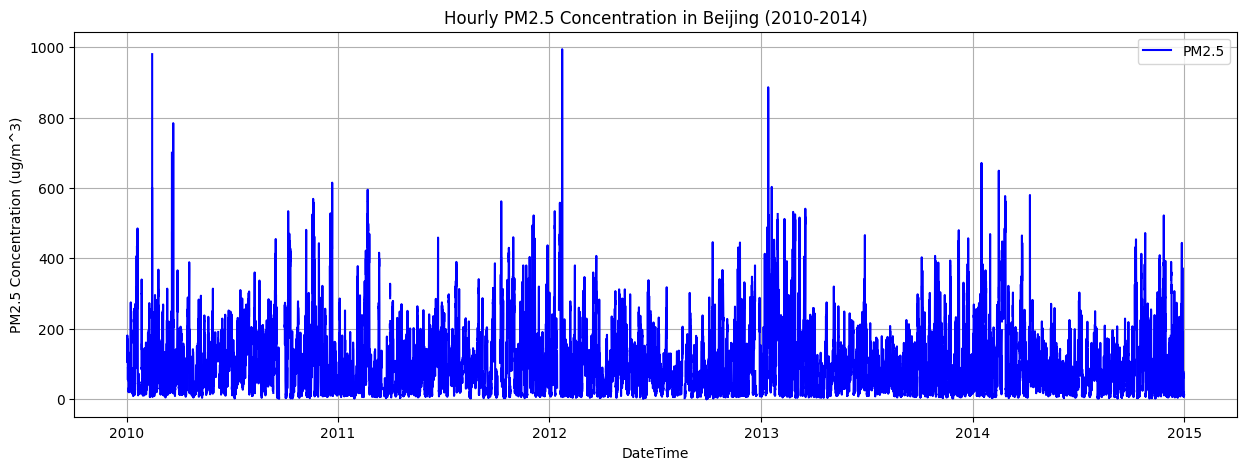

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

# آدرس فایل CSV دیتاست
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
filename = "PRSA_data_2010.1.1-2014.12.31.csv"

# دانلود فایل اگر موجود نیست
try:
    with open(filename, 'r') as f:
        print(f"File '{filename}' already exists locally.")
except FileNotFoundError:
    print(f"Downloading {filename} ...")
    urllib.request.urlretrieve(url, filename)
    print("Download complete.")

# بارگذاری داده‌ها
df = pd.read_csv(filename)

# اضافه کردن ستون datetime از ستون‌های سال، ماه، روز، ساعت
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# جدا کردن ویژگی‌ها و هدف
X = df.drop(columns=['pm2.5'])
y = df['pm2.5']

# نمایش چند نمونه از داده‌ها همراه با datetime
print(df[['datetime', 'pm2.5']].head())

# رسم تغییرات PM2.5 روی نمودار زمان
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['pm2.5'], color='blue', label='PM2.5')
plt.xlabel('DateTime')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.title('Hourly PM2.5 Concentration in Beijing (2010-2014)')
plt.legend()
plt.grid(True)
plt.show()


##1.2.3

In [ ]:


# بررسی تعداد مقادیر گمشده در هر ستون
missing_values = df.isnull().sum()
print("تعداد مقادیر گمشده در هر ستون:\n")
print(missing_values)

# محاسبه درصد مقادیر گمشده در هر ستون
missing_percent = (missing_values / len(df)) * 100
print("\nدرصد مقادیر گمشده در هر ستون:\n")
print(missing_percent)



تعداد مقادیر گمشده در هر ستون:

No             0
year           0
month          0
day            0
hour           0
pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
datetime       0
dtype: int64

درصد مقادیر گمشده در هر ستون:

No          0.000000
year        0.000000
month       0.000000
day         0.000000
hour        0.000000
pm2.5       4.716594
DEWP        0.000000
TEMP        0.000000
PRES        0.000000
cbwd        0.000000
Iws         0.000000
Is          0.000000
Ir          0.000000
datetime    0.000000
dtype: float64


In [ ]:

import pandas as pd

# پیدا کردن شماره ردیف اولین مقدار معتبر pm2.5
start_pos = df['pm2.5'].first_valid_index()

# برش داده‌ها از آن ردیف به بعد با ایندکس جدید از 0
df_cleaned = df.iloc[start_pos:].reset_index(drop=True).copy()

# پر کردن مقادیر گمشده با مقدار قبلی (forward fill)
df_cleaned.ffill(inplace=True)

# انتخاب ستون‌های اصلی به جز 'No' و 'datetime'
core_columns = [col for col in df_cleaned.columns if col not in ['No', 'datetime']]

# نمایش چند سطر اول
print(df_cleaned[core_columns].head())

print(df_cleaned[core_columns])


   year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
0  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
1  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
2  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
3  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
4  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0
       year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
0      2010      1    2     0  129.0   -16  -4.0  1020.0   SE    1.79   0   0
1      2010      1    2     1  148.0   -15  -4.0  1020.0   SE    2.68   0   0
2      2010      1    2     2  159.0   -11  -5.0  1021.0   SE    3.57   0   0
3      2010      1    2     3  181.0    -7  -5.0  1022.0   SE    5.36   1   0
4      2010      1    2     4  138.0    -7  -5.0  1022.0   SE    6.25   2   0
...     ...    ...  ...   ...    ...   ...   ...     ...  ...     ...  ..  ..
43795  2014     12   3

##1.2.4

In [ ]:
# نمایش مقادیر یکتای ستون 'cbwd'
unique_cbwd = df_cleaned['cbwd'].unique()
print("مقادیر یکتای جهت باد (cbwd):")
print(unique_cbwd)

# گرفتن آرایه مقادیر ستون 'cbwd'
cbwd_values = df_cleaned['cbwd'].values
print("\nمقادیر ستون 'cbwd':")
print(cbwd_values)


مقادیر یکتای جهت باد (cbwd):
['SE' 'cv' 'NW' 'NE']

مقادیر ستون 'cbwd':
['SE' 'SE' 'SE' ... 'NW' 'NW' 'NW']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ساخت LabelEncoder
encoder = LabelEncoder()

# تبدیل ستون cbwd به عددی
cbwd_encoded = encoder.fit_transform(df_cleaned['cbwd'].values)

# اضافه کردن ستون جدید
df_cleaned['cbwd_numerical'] = cbwd_encoded

# نمایش آرایه‌ی عددی به شکل خواسته شده
print(cbwd_encoded)

# نمایش کل dataframe به همراه ستون جدید (شامل اندیس 0 تا ...)
print(df_cleaned.reset_index(drop=True))


[2 2 2 ... 1 1 1]
          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0         25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE    1.79   
1         26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE    2.68   
2         27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE    3.57   
3         28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE    5.36   
4         29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE    6.25   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43795  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43796  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43797  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43798  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43799  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir        

##1.2.5

In [ ]:
columns = ['pm2.5', 'TEMP', 'DEWP', 'Iws']

for col in columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

    print(f"{col}: no. outliers = {outliers.shape[0]}")


pm2.5: no. outliers = 1857
TEMP: no. outliers = 0
DEWP: no. outliers = 0
Iws: no. outliers = 5101


In [ ]:
start_index = df['pm2.5'].first_valid_index()
df_filled = df.loc[start_index:].copy()
df_filled.ffill(inplace=True)

cols_to_clip = {'pm2.5', 'Iws'}
df_processed = df_filled.copy()

for col in cols_to_clip:
    q1 = df_processed[col].quantile(0.25)
    q3 = df_processed[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    df_processed[col] = df_processed[col].clip(lower_limit, upper_limit)

columns = ['pm2.5', 'TEMP', 'DEWP', 'Iws']

for col in columns:
    q1 = df_processed[col].quantile(0.25)
    q3 = df_processed[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    outliers_df = df_processed[(df_processed[col] < lower_limit) | (df_processed[col] > upper_limit)]

    print(f"{col}: تعداد نقاط پرت = {outliers_df.shape[0]}")


pm2.5: تعداد نقاط پرت = 0
TEMP: تعداد نقاط پرت = 0
DEWP: تعداد نقاط پرت = 0
Iws: تعداد نقاط پرت = 0


##1.2.6

In [ ]:
# فرض می‌کنیم df_filled موجود است و قبلاً پردازش‌های اولیه رو انجام دادی
df_model = df_filled.copy()

# اینجا کد مربوط به کلیپ کردن یا هر پردازش دیگه که میخوای روی df_model انجام بدی
# ...

# حالا میتونی کد دسته‌بندی AQI رو اجرا کنی:
df_with_AQI = df_model.copy()

def get_aqi_category(pm25_value):
    if pm25_value <= 12.0:
        return 'Good'
    elif pm25_value <= 35.4:
        return 'Moderate'
    elif pm25_value <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif pm25_value <= 150.4:
        return 'Unhealthy'
    elif pm25_value <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df_with_AQI['AQI_Category'] = df_with_AQI['pm2.5'].apply(get_aqi_category)
df_with_AQI.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,AQI_Category
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,Unhealthy
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,Unhealthy
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,Very Unhealthy
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,Very Unhealthy
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,Unhealthy


##1.2.7

In [ ]:
# کپی کردن دیتافریم با دسته‌بندی AQI
df_with_lags = df_with_AQI.copy()

# ایجاد ویژگی‌های لگ برای مقدار pm2.5 با تاخیر ۲ ساعت و ۲۴ ساعت
df_with_lags['pm2.5_lag_2h'] = df_with_lags['pm2.5'].shift(periods=2)
df_with_lags['pm2.5_lag_24h'] = df_with_lags['pm2.5'].shift(periods=24)

df_with_lags.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,AQI_Category,pm2.5_lag_2h,pm2.5_lag_24h
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,Unhealthy,NaN,NaN
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,Unhealthy,NaN,NaN
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,Very Unhealthy,129.0,NaN
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,Very Unhealthy,148.0,NaN
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,Unhealthy,159.0,NaN


In [ ]:
# حذف ردیف‌هایی که در ستون‌های لگ مقادیر گمشده دارند
df_lag_cleaned = df_with_lags.dropna(subset=['pm2.5_lag_2h', 'pm2.5_lag_24h'])

# بازتنظیم ایندکس بدون نگه داشتن ایندکس قبلی
df_lag_cleaned.reset_index(drop=True, inplace=True)

display(df_lag_cleaned)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,AQI_Category,pm2.5_lag_2h,pm2.5_lag_24h
0,49,2010,1,3,0,90.0,-7,-6.0,1027.0,SE,58.56,4,0,2010-01-03 00:00:00,Unhealthy,156.0,129.0
1,50,2010,1,3,1,63.0,-8,-6.0,1026.0,SE,61.69,5,0,2010-01-03 01:00:00,Unhealthy,126.0,148.0
2,51,2010,1,3,2,65.0,-8,-7.0,1026.0,SE,65.71,6,0,2010-01-03 02:00:00,Unhealthy,90.0,159.0
3,52,2010,1,3,3,55.0,-8,-7.0,1025.0,SE,68.84,7,0,2010-01-03 03:00:00,Unhealthy for Sensitive Groups,63.0,181.0
4,53,2010,1,3,4,65.0,-8,-7.0,1024.0,SE,72.86,8,0,2010-01-03 04:00:00,Unhealthy,65.0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43771,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00,Good,9.0,35.0
43772,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00,Good,10.0,26.0
43773,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00,Good,8.0,20.0
43774,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00,Good,10.0,8.0


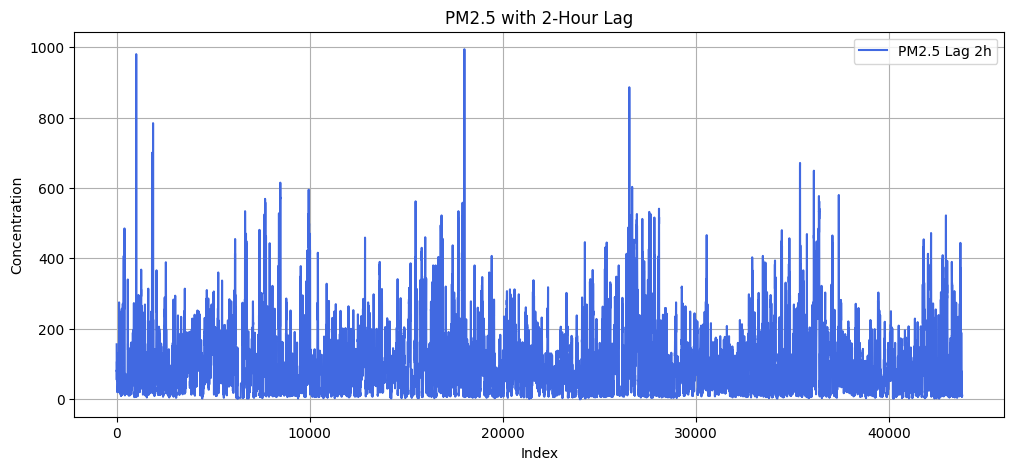

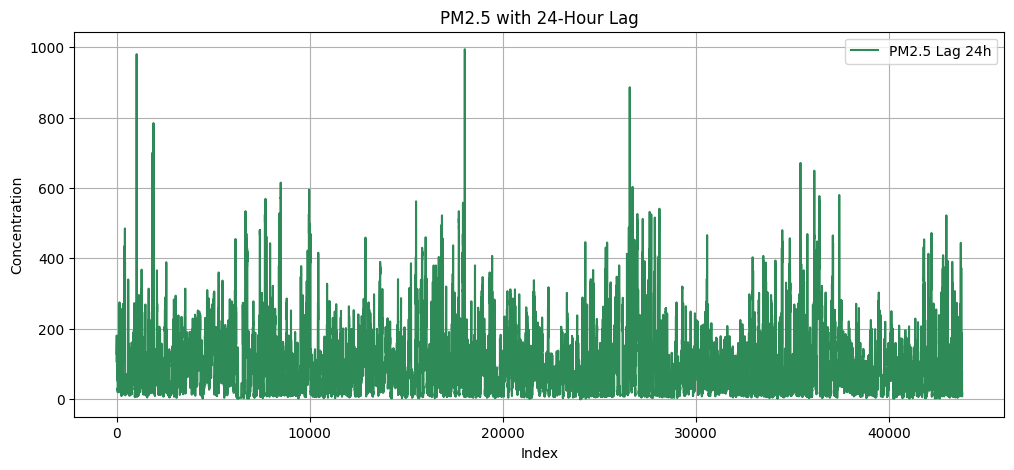

In [ ]:
import matplotlib.pyplot as plt

# نمودار برای لگ ۲ ساعته
plt.figure(figsize=(12, 5))
plt.plot(df_lag_cleaned['pm2.5_lag_2h'], color='royalblue', label='PM2.5 Lag 2h')
plt.title('PM2.5 with 2-Hour Lag')
plt.xlabel('Index')
plt.ylabel('Concentration')
plt.legend(loc='upper right')
plt.grid(visible=True)
plt.show()

# نمودار برای لگ ۲۴ ساعته
plt.figure(figsize=(12, 5))
plt.plot(df_lag_cleaned['pm2.5_lag_24h'], color='seagreen', label='PM2.5 Lag 24h')
plt.title('PM2.5 with 24-Hour Lag')
plt.xlabel('Index')
plt.ylabel('Concentration')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


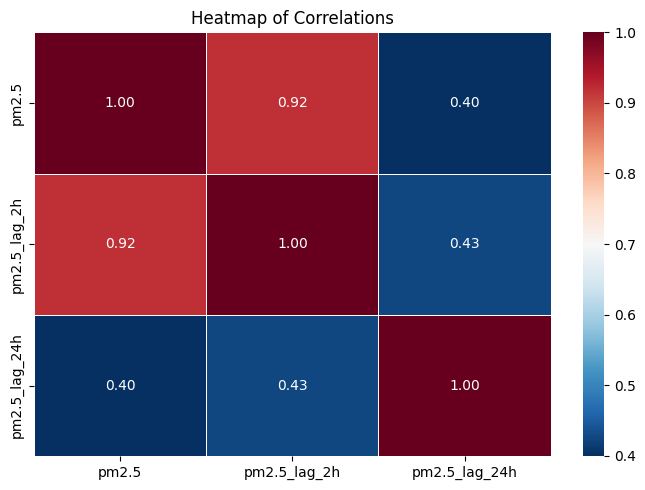

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# انتخاب ستون‌های مورد نظر
corr_data = df_lag_cleaned.loc[:, ['pm2.5', 'pm2.5_lag_2h', 'pm2.5_lag_24h']]

# محاسبه ماتریس همبستگی
correlation = corr_data.corr()

# رسم هیتمپ
plt.figure(figsize=(7, 5))
sns.heatmap(correlation, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.tight_layout()
plt.show()

In [ ]:
df_added_rolling = df_lag_cleaned.copy()
df_added_rolling['pm2.5_roll_mean_24h'] = df_lag_cleaned['pm2.5'].rolling(window=24).mean()


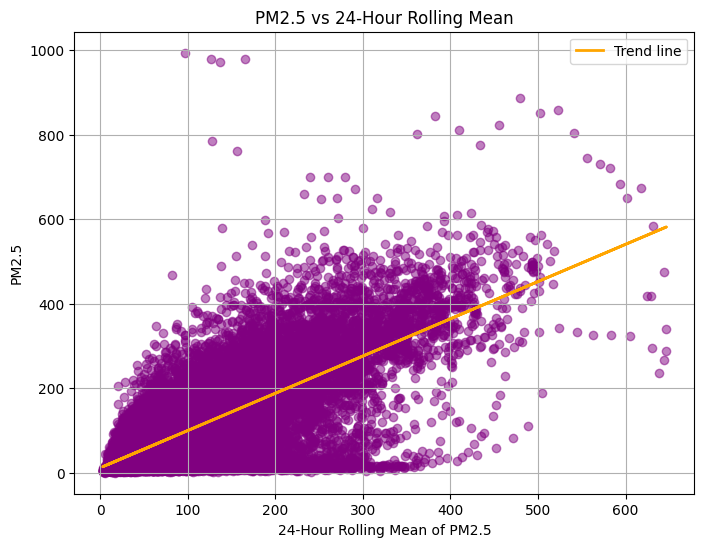

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(df_added_rolling['pm2.5_roll_mean_24h'], df_added_rolling['pm2.5'], alpha=0.5, color='purple')

# اضافه کردن خط روند
mask = ~df_added_rolling['pm2.5_roll_mean_24h'].isna() & ~df_added_rolling['pm2.5'].isna()
x = df_added_rolling.loc[mask, 'pm2.5_roll_mean_24h']
y = df_added_rolling.loc[mask, 'pm2.5']

coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x, poly1d_fn(x), color='orange', linewidth=2, label='Trend line')

plt.title('PM2.5 vs 24-Hour Rolling Mean')
plt.xlabel('24-Hour Rolling Mean of PM2.5')
plt.ylabel('PM2.5')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# فرض: df_added_rolling از مراحل قبل آماده‌ست

df_added_encoding = df_added_rolling.copy()

# encoding ساعت
df_added_encoding['hour_sin'] = np.sin(2 * np.pi * df_added_encoding['hour'] / 24)
df_added_encoding['hour_cos'] = np.cos(2 * np.pi * df_added_encoding['hour'] / 24)

# encoding روز (با فرض 365 روز)
df_added_encoding['day_sin'] = np.sin(2 * np.pi * df_added_encoding['day'] / 365)
df_added_encoding['day_cos'] = np.cos(2 * np.pi * df_added_encoding['day'] / 365)

# encoding سال نرمال‌شده
df_added_encoding['year_norm'] = df_added_encoding['year'] - df_added_encoding['year'].min()
df_added_encoding['year_sin'] = np.sin(2 * np.pi * df_added_encoding['year_norm'] / (df_added_encoding['year_norm'].max() + 1))
df_added_encoding['year_cos'] = np.cos(2 * np.pi * df_added_encoding['year_norm'] / (df_added_encoding['year_norm'].max() + 1))

# نمایش نمونه‌ای از خروجی مشابه داده‌ای که گفتی:
pd.set_option('display.max_columns', None)  # نمایش همه ستون‌ها
df_added_encoding.head()  # نمایش چند سطر اول برای بررسی


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,AQI_Category,pm2.5_lag_2h,pm2.5_lag_24h,pm2.5_roll_mean_24h,hour_sin,hour_cos,day_sin,day_cos,year_norm,year_sin,year_cos
0,49,2010,1,3,0,90.0,-7,-6.0,1027.0,SE,58.56,4,0,2010-01-03 00:00:00,Unhealthy,156.0,129.0,NaN,0.000000,1.000000,0.05162,0.998667,0,0.0,1.0
1,50,2010,1,3,1,63.0,-8,-6.0,1026.0,SE,61.69,5,0,2010-01-03 01:00:00,Unhealthy,126.0,148.0,NaN,0.258819,0.965926,0.05162,0.998667,0,0.0,1.0
2,51,2010,1,3,2,65.0,-8,-7.0,1026.0,SE,65.71,6,0,2010-01-03 02:00:00,Unhealthy,90.0,159.0,NaN,0.500000,0.866025,0.05162,0.998667,0,0.0,1.0
3,52,2010,1,3,3,55.0,-8,-7.0,1025.0,SE,68.84,7,0,2010-01-03 03:00:00,Unhealthy for Sensitive Groups,63.0,181.0,NaN,0.707107,0.707107,0.05162,0.998667,0,0.0,1.0
4,53,2010,1,3,4,65.0,-8,-7.0,1024.0,SE,72.86,8,0,2010-01-03 04:00:00,Unhealthy,65.0,138.0,NaN,0.866025,0.500000,0.05162,0.998667,0,0.0,1.0


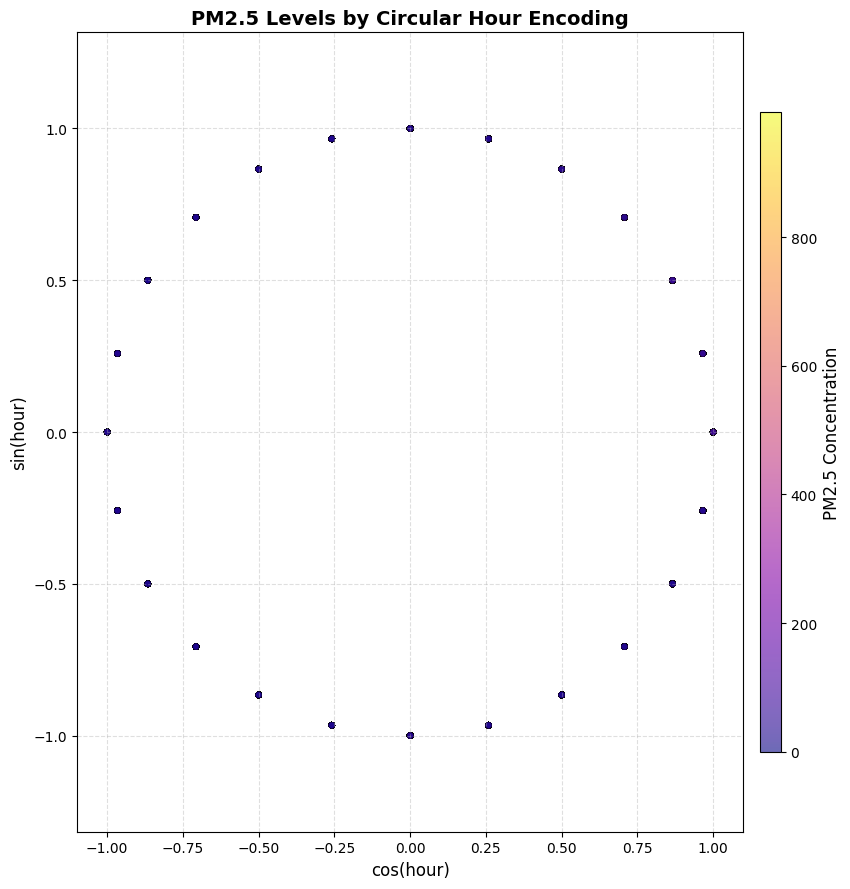

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# فرض بر اینکه df_added_encoding قبلاً آماده‌ست

plt.figure(figsize=(9, 9))

scatter = plt.scatter(
    df_added_encoding['hour_cos'],
    df_added_encoding['hour_sin'],
    c=df_added_encoding['pm2.5'],
    cmap='plasma',  # رنگ گرادیان از آبی به قرمز
    alpha=0.6,
    s=20,  # اندازه نقاط
    edgecolors='k', linewidths=0.2  # حاشیه مشکی نازک
)

cbar = plt.colorbar(scatter, shrink=0.8, aspect=30, pad=0.02)
cbar.set_label('PM2.5 Concentration', fontsize=12)

plt.xlabel('cos(hour)', fontsize=12)
plt.ylabel('sin(hour)', fontsize=12)
plt.title('PM2.5 Levels by Circular Hour Encoding', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
plt.axis('equal')  # حفظ شکل دایره‌ای

plt.tight_layout()
plt.show()


In [ ]:
df_added_season = df_added_encoding.copy()

# تعریف نگاشت ماه به فصل با دیکشنری
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# اعمال نگاشت با استفاده از map
df_added_season['season'] = df_added_season['month'].map(season_map)

df_added_season




,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,AQI_Category,pm2.5_lag_2h,pm2.5_lag_24h,pm2.5_roll_mean_24h,hour_sin,hour_cos,day_sin,day_cos,year_norm,year_sin,year_cos,season
0,49,2010,1,3,0,90.0,-7,-6.0,1027.0,SE,58.56,4,0,2010-01-03 00:00:00,Unhealthy,156.0,129.0,NaN,0.000000,1.000000,0.051620,0.998667,0,0.000000,1.000000,Winter
1,50,2010,1,3,1,63.0,-8,-6.0,1026.0,SE,61.69,5,0,2010-01-03 01:00:00,Unhealthy,126.0,148.0,NaN,0.258819,0.965926,0.051620,0.998667,0,0.000000,1.000000,Winter
2,51,2010,1,3,2,65.0,-8,-7.0,1026.0,SE,65.71,6,0,2010-01-03 02:00:00,Unhealthy,90.0,159.0,NaN,0.500000,0.866025,0.051620,0.998667,0,0.000000,1.000000,Winter
3,52,2010,1,3,3,55.0,-8,-7.0,1025.0,SE,68.84,7,0,2010-01-03 03:00:00,Unhealthy for Sensitive Groups,63.0,181.0,NaN,0.707107,0.707107,0.051620,0.998667,0,0.000000,1.000000,Winter
4,53,2010,1,3,4,65.0,-8,-7.0,1024.0,SE,72.86,8,0,2010-01-03 04:00:00,Unhealthy,65.0,138.0,NaN,0.866025,0.500000,0.051620,0.998667,0,0.000000,1.000000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43771,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00,Good,9.0,35.0,11.291667,-0.965926,0.258819,0.508671,0.860961,4,-0.951057,0.309017,Winter
43772,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00,Good,10.0,26.0,10.625000,-0.866025,0.500000,0.508671,0.860961,4,-0.951057,0.309017,Winter
43773,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00,Good,8.0,20.0,10.208333,-0.707107,0.707107,0.508671,0.860961,4,-0.951057,0.309017,Winter
43774,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00,Good,10.0,8.0,10.208333,-0.500000,0.866025,0.508671,0.860961,4,-0.951057,0.309017,Winter


In [ ]:
seasonal_avg = df_added_season.groupby('season')['pm2.5'].mean().sort_values(ascending=False)

print("میانگین PM2.5 برای هر فصل (µg/m³):")
print(seasonal_avg)

میانگین PM2.5 برای هر فصل (µg/m³):
season
Winter    109.792131
Fall      101.582509
Summer     91.739764
Spring     88.245380
Name: pm2.5, dtype: float64


<ipython-input-28-536533bbf6f8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


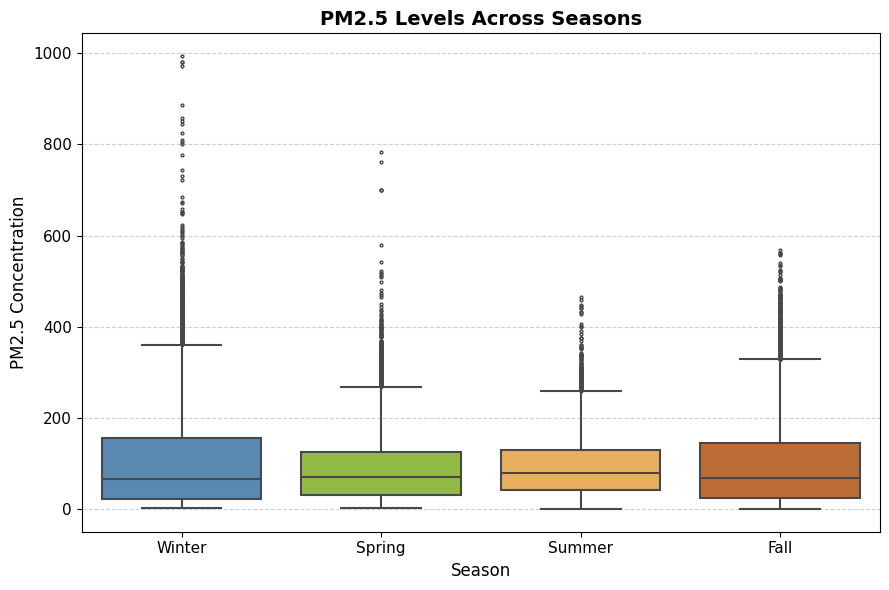

In [ ]:
plt.figure(figsize=(9, 6))

# پالت رنگی سفارشی
palette = {'Winter': '#4B8BBE', 'Spring': '#9ACD32', 'Summer': '#FFB347', 'Fall': '#D2691E'}

# رسم نمودار با رنگ‌های خاص برای هر فصل
sns.boxplot(
    x='season',
    y='pm2.5',
    data=df_added_season,
    order=['Winter', 'Spring', 'Summer', 'Fall'],
    palette=palette,
    linewidth=1.5,
    fliersize=2  # نقاط خارج از محدوده کوچک‌تر بشن
)

plt.title('PM2.5 Levels Across Seasons', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


2025-06-09 17:19:20,465 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


میانگین PM2.5 برای هر روز هفته (µg/m³):
weekday
Monday        92.443008
Tuesday       96.249840
Wednesday     97.284483
Thursday      96.920353
Friday        99.845353
Saturday     102.989103
Sunday        98.595945
Name: pm2.5, dtype: float64


<ipython-input-29-e1c3ef226df1>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
2025-06-09 17:19:20,635 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


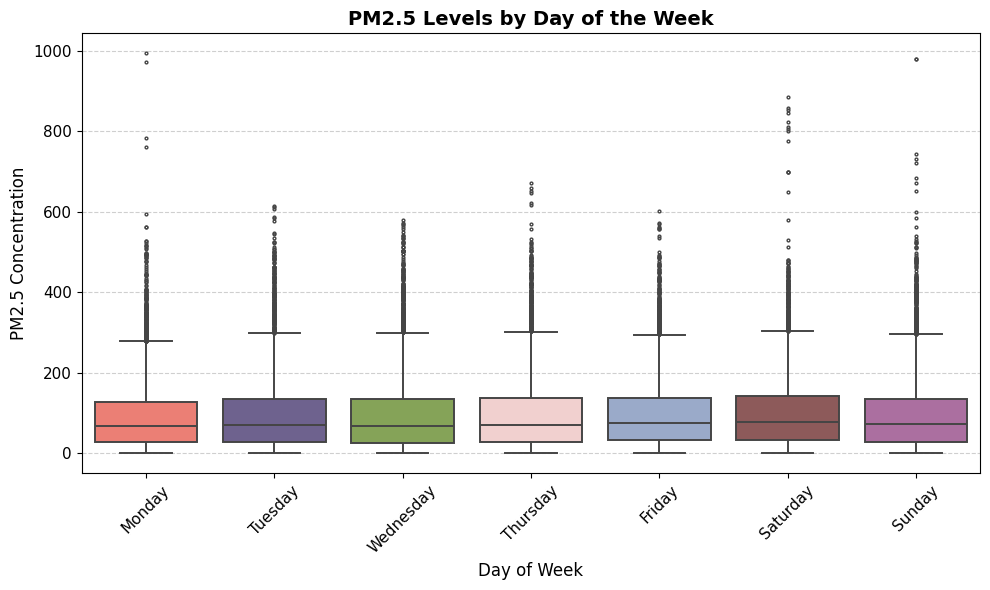

In [ ]:
# اطمینان از ایجاد ستون datetime و weekday
df_added_season['datetime'] = pd.to_datetime(df_added_season[['year', 'month', 'day', 'hour']])
df_added_season['weekday'] = df_added_season['datetime'].dt.day_name()

# ترتیب روزهای هفته
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# پالت رنگ برای روزهای هفته
weekday_palette = {
    'Monday': '#FF6F61',
    'Tuesday': '#6B5B95',
    'Wednesday': '#88B04B',
    'Thursday': '#F7CAC9',
    'Friday': '#92A8D1',
    'Saturday': '#955251',
    'Sunday': '#B565A7'
}

# ترتیب روزهای هفته
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# محاسبه میانگین PM2.5 برای هر روز هفته با ترتیب دلخواه
weekly_avg = df_added_season.groupby('weekday')['pm2.5'].mean().reindex(order)

# نمایش خروجی
print("میانگین PM2.5 برای هر روز هفته (µg/m³):")
print(weekly_avg)


# رسم نمودار
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='weekday',
    y='pm2.5',
    data=df_added_season,
    order=order,
    palette=weekday_palette,
    linewidth=1.4,
    fliersize=2
)

plt.title('PM2.5 Levels by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


همبستگی PM2.5 با متغیرها:
pm2.5    1.000000
TEMP    -0.077505
PRES    -0.057698
Iws     -0.243117
Name: pm2.5, dtype: float64


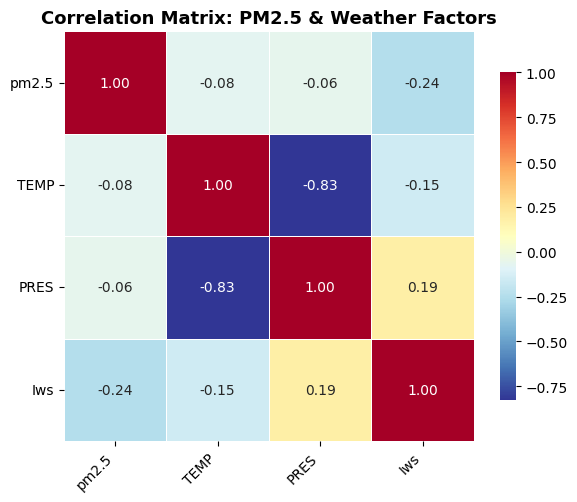

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# تعریف ستون‌های مورد بررسی
corr_cols = ['pm2.5', 'TEMP', 'PRES', 'Iws']

# محاسبه ماتریس همبستگی
corr_matrix = df_added_season[corr_cols].corr()

# چاپ همبستگی pm2.5 با سایر متغیرها
print("همبستگی PM2.5 با متغیرها:")
print(corr_matrix['pm2.5'])

# رسم heatmap از ماتریس همبستگی
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdYlBu_r',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Matrix: PM2.5 & Weather Factors', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


میانگین PM2.5 برای هر ساعت (µg/m³):
hour
0     111.590461
1     112.354167
2     109.865132
3     107.024671
4     103.173246
5      99.823465
6      96.706140
7      95.590461
8      95.390899
9      93.944079
10     92.601425
11     91.101425
12     89.026864
13     87.361842
14     85.807018
15     84.983553
16     85.383224
17     86.853618
18     90.632127
19     96.304276
20    103.058114
21    107.785088
22    109.515351
23    110.305921
Name: pm2.5, dtype: float64


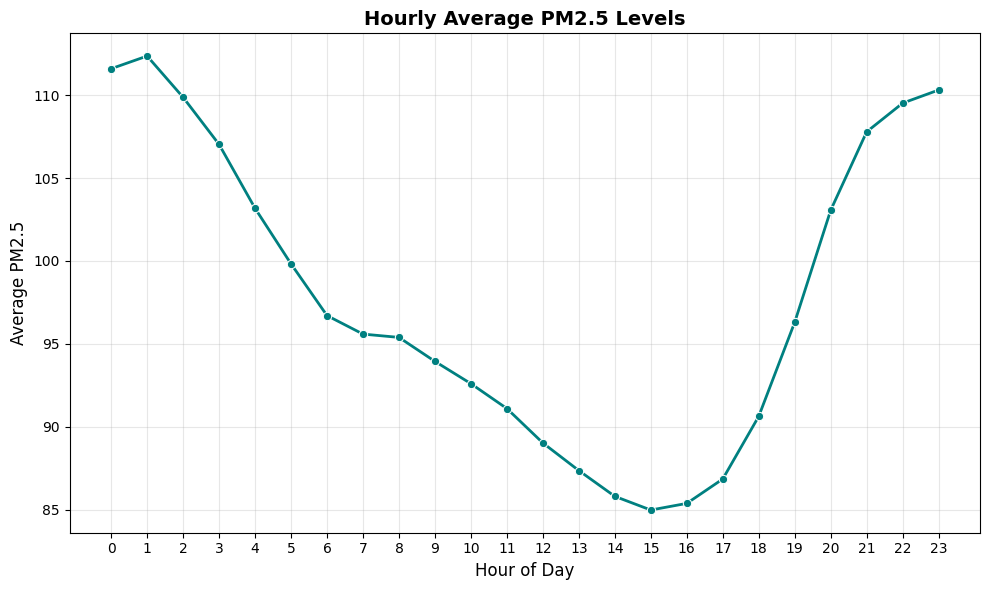

In [ ]:
# محاسبه میانگین ساعتی PM2.5
hourly_avg = df_added_season.groupby('hour')['pm2.5'].mean()

# چاپ عددی میانگین‌ها
print("میانگین PM2.5 برای هر ساعت (µg/m³):")
print(hourly_avg)

# رسم نمودار خطی با داده‌های بالا
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=hourly_avg.index,
    y=hourly_avg.values,
    marker='o',
    linewidth=2,
    color='teal'
)

plt.title('Hourly Average PM2.5 Levels', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average PM2.5', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##1.2.8

In [ ]:
# اطمینان از کپی سالم دیتا
df_added_season = df_added_encoding.copy()

# افزودن ستون فصل
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_added_season['season'] = df_added_season['month'].apply(get_season)

# افزودن ستون datetime از year, month, day, hour
df_added_season['datetime'] = pd.to_datetime(df_added_season[['year', 'month', 'day', 'hour']])

# افزودن نام روز هفته از datetime
df_added_season['weekday'] = df_added_season['datetime'].dt.day_name()

# نمایش نهایی
df_added_season = df_added_season.sort_values('datetime').reset_index(drop=True)
df_added_season


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,AQI_Category,pm2.5_lag_2h,pm2.5_lag_24h,pm2.5_roll_mean_24h,hour_sin,hour_cos,day_sin,day_cos,year_norm,year_sin,year_cos,season,weekday
0,49,2010,1,3,0,90.0,-7,-6.0,1027.0,SE,58.56,4,0,2010-01-03 00:00:00,Unhealthy,156.0,129.0,NaN,0.000000,1.000000,0.051620,0.998667,0,0.000000,1.000000,Winter,Sunday
1,50,2010,1,3,1,63.0,-8,-6.0,1026.0,SE,61.69,5,0,2010-01-03 01:00:00,Unhealthy,126.0,148.0,NaN,0.258819,0.965926,0.051620,0.998667,0,0.000000,1.000000,Winter,Sunday
2,51,2010,1,3,2,65.0,-8,-7.0,1026.0,SE,65.71,6,0,2010-01-03 02:00:00,Unhealthy,90.0,159.0,NaN,0.500000,0.866025,0.051620,0.998667,0,0.000000,1.000000,Winter,Sunday
3,52,2010,1,3,3,55.0,-8,-7.0,1025.0,SE,68.84,7,0,2010-01-03 03:00:00,Unhealthy for Sensitive Groups,63.0,181.0,NaN,0.707107,0.707107,0.051620,0.998667,0,0.000000,1.000000,Winter,Sunday
4,53,2010,1,3,4,65.0,-8,-7.0,1024.0,SE,72.86,8,0,2010-01-03 04:00:00,Unhealthy,65.0,138.0,NaN,0.866025,0.500000,0.051620,0.998667,0,0.000000,1.000000,Winter,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43771,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00,Good,9.0,35.0,11.291667,-0.965926,0.258819,0.508671,0.860961,4,-0.951057,0.309017,Winter,Wednesday
43772,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00,Good,10.0,26.0,10.625000,-0.866025,0.500000,0.508671,0.860961,4,-0.951057,0.309017,Winter,Wednesday
43773,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00,Good,8.0,20.0,10.208333,-0.707107,0.707107,0.508671,0.860961,4,-0.951057,0.309017,Winter,Wednesday
43774,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00,Good,10.0,8.0,10.208333,-0.500000,0.866025,0.508671,0.860961,4,-0.951057,0.309017,Winter,Wednesday


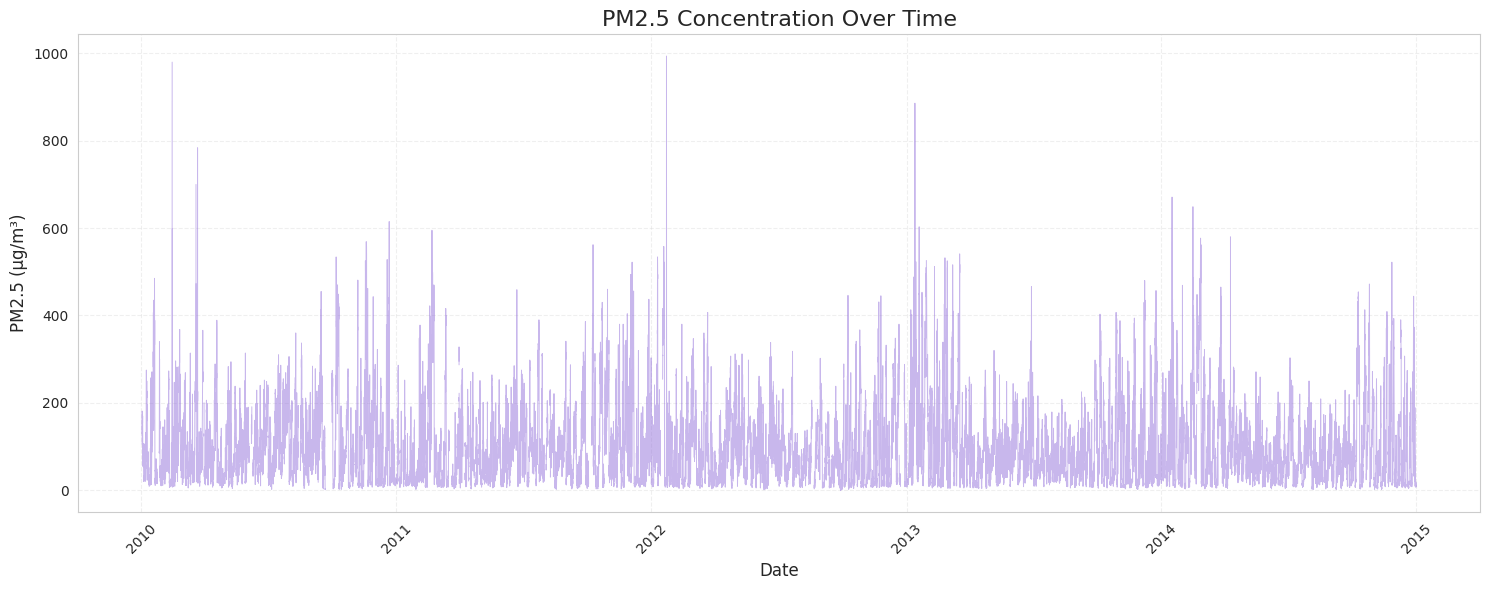

In [ ]:
import matplotlib.dates as mdates
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

plt.plot(df['datetime'], df['pm2.5'], color='mediumpurple', alpha=0.5, linewidth=0.7)

plt.title('PM2.5 Concentration Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)

# بهبود در محور x برای خوانایی بهتر
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


In [ ]:
month_avg = df_added_season.groupby('month')['pm2.5'].mean()
print("میانگین PM2.5 برای هر ماه (µg/m³):")
print(month_avg)


میانگین PM2.5 برای هر ماه (µg/m³):
month
1     109.730664
2     126.092790
3      99.629032
4      84.046389
5      80.925269
6      96.887778
7      94.425538
8      84.072043
9      80.456389
10    118.242473
11    105.493333
12     95.024462
Name: pm2.5, dtype: float64


In [ ]:
max_row = df.loc[df['pm2.5'].idxmax()]
print(f"On {max_row['datetime']}, the highest PM2.5 level of {max_row['pm2.5']} µg/m³ was observed.")


On 2012-01-23 01:00:00, the highest PM2.5 level of 994.0 µg/m³ was observed.


In [ ]:
df = df_added_rolling
max_row = df.loc[df['pm2.5'].idxmax()]
print(f"On {max_row['datetime']}, the PM2.5 level reached its maximum value of {max_row['pm2.5']} µg/m³.")


On 2012-01-23 01:00:00, the PM2.5 level reached its maximum value of 994.0 µg/m³.


##1.2.9

In [ ]:
import pandas as pd

# نگاشت شماره ماه به نام ماه
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# تعداد داده‌ها در هر ماه با نام ماه
monthly_count = df_added_season['month'].value_counts().sort_index()
monthly_df = pd.DataFrame({
    'Month Number': monthly_count.index,
    'Month Name': monthly_count.index.map(month_names),
    'Count': monthly_count.values
})
print("تعداد داده‌ها در هر ماه:")
display(monthly_df)

# تعداد داده‌ها در هر روز ماه
daily_count = df_added_season['day'].value_counts().sort_index()
daily_df = pd.DataFrame({'Day of Month': daily_count.index, 'Count': daily_count.values})
print("تعداد داده‌ها در هر روز ماه:")
display(daily_df)

# تعداد داده‌ها در هر ساعت
hourly_count = df_added_season['hour'].value_counts().sort_index()
hourly_df = pd.DataFrame({'Hour': hourly_count.index, 'Count': hourly_count.values})
print("تعداد داده‌ها در هر ساعت:")
display(hourly_df)

# تعداد داده‌ها برای دسته‌بندی آلودگی هوا
PM_Category_count = df_added_season['AQI_Category'].value_counts().sort_index()
PM_cat_df = pd.DataFrame({'AQI Category': PM_Category_count.index, 'Count': PM_Category_count.values})
print("تعداد داده‌های وضعیت آلودگی:")
display(PM_cat_df)


تعداد داده‌ها در هر ماه:


,Month Number,Month Name,Count
0,1,January,3672
1,2,February,3384
2,3,March,3720
3,4,April,3600
4,5,May,3720
5,6,June,3600
6,7,July,3720
7,8,August,3720
8,9,September,3600
9,10,October,3720


تعداد داده‌ها در هر روز ماه:


,Day of Month,Count
0,1,1416
1,2,1416
2,3,1440
3,4,1440
4,5,1440
5,6,1440
6,7,1440
7,8,1440
8,9,1440
9,10,1440


تعداد داده‌ها در هر ساعت:


,Hour,Count
0,0,1824
1,1,1824
2,2,1824
3,3,1824
4,4,1824
5,5,1824
6,6,1824
7,7,1824
8,8,1824
9,9,1824


تعداد داده‌های وضعیت آلودگی:


,AQI Category,Count
0,Good,3707
1,Hazardous,3110
2,Moderate,9151
3,Unhealthy,16393
4,Unhealthy for Sensitive Groups,5267
5,Very Unhealthy,6148


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ساخت LabelEncoder
encoder = LabelEncoder()

# اعمال بر روی df_added_season
df_added_season['cbwd_numeric'] = encoder.fit_transform(df_added_season['cbwd'])

# نمایش مقدار عددی ستون جدید
print(df_added_season[['cbwd', 'cbwd_numeric']].drop_duplicates())



   cbwd  cbwd_numeric
0    SE             2
18   cv             3
20   NW             1
53   NE             0


In [ ]:
selected_columns = [
    'DEWP', 'TEMP', 'PRES', 'Iws', 'Ir', 'Is', 'cbwd_numeric',
    'hour', 'month', 'weekday',
    'pm2.5', 'AQI_Category'
]

df_model_ready = df_added_season[selected_columns].copy()
df_model_ready

,DEWP,TEMP,PRES,Iws,Ir,Is,cbwd_numeric,hour,month,weekday,pm2.5,AQI_Category
0,-7,-6.0,1027.0,58.56,0,4,2,0,1,Sunday,90.0,Unhealthy
1,-8,-6.0,1026.0,61.69,0,5,2,1,1,Sunday,63.0,Unhealthy
2,-8,-7.0,1026.0,65.71,0,6,2,2,1,Sunday,65.0,Unhealthy
3,-8,-7.0,1025.0,68.84,0,7,2,3,1,Sunday,55.0,Unhealthy for Sensitive Groups
4,-8,-7.0,1024.0,72.86,0,8,2,4,1,Sunday,65.0,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
43771,-23,-2.0,1034.0,231.97,0,0,1,19,12,Wednesday,8.0,Good
43772,-22,-3.0,1034.0,237.78,0,0,1,20,12,Wednesday,10.0,Good
43773,-22,-3.0,1034.0,242.70,0,0,1,21,12,Wednesday,10.0,Good
43774,-22,-4.0,1034.0,246.72,0,0,1,22,12,Wednesday,8.0,Good


<ipython-input-40-e65709e09361>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


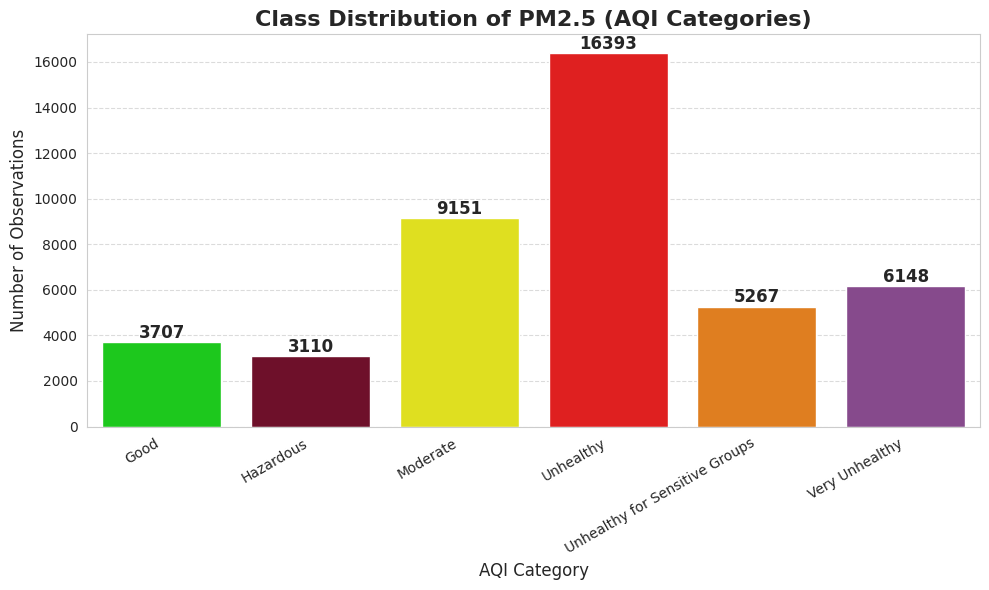

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# محاسبه توزیع دسته‌ها
class_counts = df['AQI_Category'].value_counts().sort_index()

# پالت رنگ مناسب برای دسته‌های AQI
palette = {
    'Good': '#00e400',
    'Moderate': '#ffff00',
    'Unhealthy for Sensitive Groups': '#ff7e00',
    'Unhealthy': '#ff0000',
    'Very Unhealthy': '#8f3f97',
    'Hazardous': '#7e0023'
}

# رسم نمودار
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    palette=[palette.get(cat, '#999999') for cat in class_counts.index]
)

# اضافه کردن مقدار بالای هر ستون
for i, val in enumerate(class_counts.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=12, fontweight='bold')

# تنظیمات ظاهری
plt.title('Class Distribution of PM2.5 (AQI Categories)', fontsize=16, fontweight='bold')
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('AQI Category', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Balanced class counts:
AQI_Category
Good                              3110
Hazardous                         3110
Moderate                          3110
Unhealthy                         3110
Unhealthy for Sensitive Groups    3110
Very Unhealthy                    3110
Name: count, dtype: int64


<ipython-input-41-9603521c40ca>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


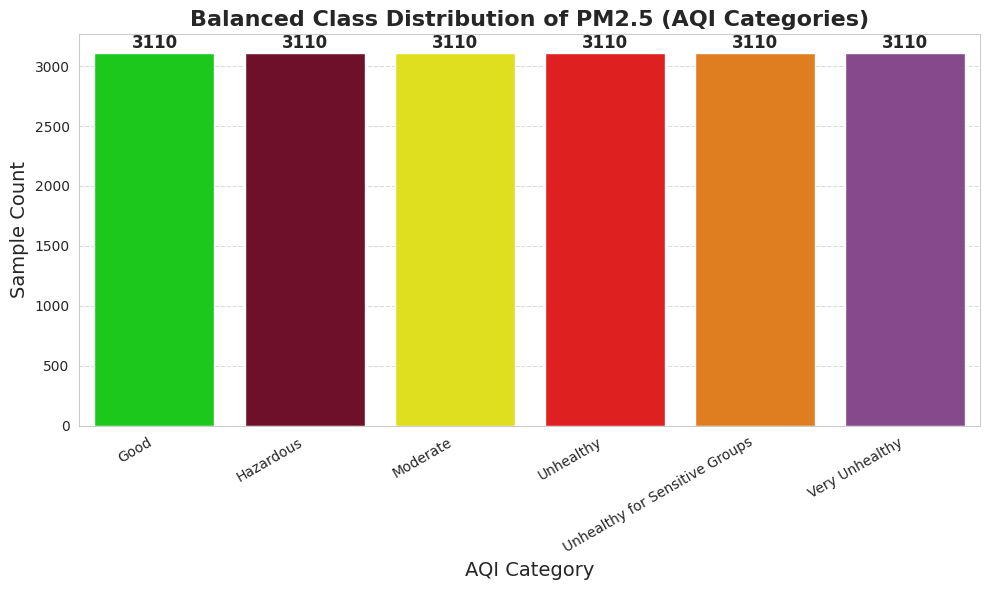

In [ ]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# حذف نمونه‌هایی که مقدار AQI_Category ندارند
df_aqi = df.dropna(subset=['AQI_Category'])

# دریافت لیست کلاس‌ها و کمترین تعداد نمونه در بین کلاس‌ها
classes = df_aqi['AQI_Category'].unique()
min_count = df_aqi['AQI_Category'].value_counts().min()

# بالانس کردن داده‌ها با نمونه‌برداری بدون جایگزینی
balanced_parts = []
for cls in classes:
    cls_df = df_aqi[df_aqi['AQI_Category'] == cls]
    balanced_part = resample(cls_df, replace=False, n_samples=min_count, random_state=42)
    balanced_parts.append(balanced_part)

# ترکیب بخش‌های بالانس شده و مخلوط کردن ردیف‌ها
df_balanced_aqi = pd.concat(balanced_parts).sample(frac=1, random_state=42).reset_index(drop=True)

# محاسبه تعداد نمونه هر کلاس پس از بالانس و نمایش آن
class_counts = df_balanced_aqi['AQI_Category'].value_counts().sort_index()
print("Balanced class counts:")
print(class_counts)

# تعریف پالت رنگ برای هر کلاس (اختیاری، بر اساس AQI)
palette = {
    'Good': '#00e400',
    'Moderate': '#ffff00',
    'Unhealthy for Sensitive Groups': '#ff7e00',
    'Unhealthy': '#ff0000',
    'Very Unhealthy': '#8f3f97',
    'Hazardous': '#7e0023'
}

# رسم نمودار میله‌ای
plt.figure(figsize=(10, 6))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    palette=[palette.get(c, '#999999') for c in class_counts.index]
)

# اضافه کردن تعداد نمونه بالای هر ستون
for i, val in enumerate(class_counts.values):
    plt.text(i, val + 10, str(val), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Balanced Class Distribution of PM2.5 (AQI Categories)', fontsize=16, fontweight='bold')
plt.xlabel('AQI Category', fontsize=14)
plt.ylabel('Sample Count', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##1.2.10

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# نگاشت دستی weekday
weekday_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

# تعریف ستون‌های مورد نظر
selected_columns = [
    'DEWP', 'TEMP', 'PRES', 'Iws', 'Ir', 'Is', 'cbwd_numeric',
    'hour', 'month', 'weekday',
    'pm2.5', 'AQI_Category'
]

# ساخت نسخه‌ی جدید
df_model_ready = df_added_season[selected_columns].copy()

# اعمال نگاشت روی weekday
df_model_ready['weekday'] = df_model_ready['weekday'].map(weekday_mapping)

# جدا کردن ویژگی‌ها و برچسب
features = df_model_ready.drop(columns=['AQI_Category'])
target = df_model_ready['AQI_Category']

# نرمال‌سازی ویژگی‌ها با MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# ساخت دیتافریم نهایی نرمال‌شده
df_model_ready_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_model_ready_scaled['AQI_Category'] = target.values

# نمایش چند سطر اول برای بررسی
print(df_model_ready_scaled.shape)
df_model_ready_scaled


# حالا آماده استفاده برای تقسیم، SMOTE و مدل‌ها


(43776, 12)


,DEWP,TEMP,PRES,Iws,Ir,Is,cbwd_numeric,hour,month,weekday,pm2.5,AQI_Category
0,0.485294,0.213115,0.654545,0.099308,0.0,0.148148,0.666667,0.000000,0.0,1.000000,0.090543,Unhealthy
1,0.470588,0.213115,0.636364,0.104657,0.0,0.185185,0.666667,0.043478,0.0,1.000000,0.063380,Unhealthy
2,0.470588,0.196721,0.636364,0.111527,0.0,0.222222,0.666667,0.086957,0.0,1.000000,0.065392,Unhealthy
3,0.470588,0.196721,0.618182,0.116876,0.0,0.259259,0.666667,0.130435,0.0,1.000000,0.055332,Unhealthy for Sensitive Groups
4,0.470588,0.196721,0.600000,0.123746,0.0,0.296296,0.666667,0.173913,0.0,1.000000,0.065392,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
43771,0.250000,0.278689,0.781818,0.395659,0.0,0.000000,0.333333,0.826087,1.0,0.333333,0.008048,Good
43772,0.264706,0.262295,0.781818,0.405588,0.0,0.000000,0.333333,0.869565,1.0,0.333333,0.010060,Good
43773,0.264706,0.262295,0.781818,0.413996,0.0,0.000000,0.333333,0.913043,1.0,0.333333,0.010060,Good
43774,0.264706,0.245902,0.781818,0.420866,0.0,0.000000,0.333333,0.956522,1.0,0.333333,0.008048,Good


##1.2.11

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# جدا کردن ویژگی‌ها و برچسب
X = df_model_ready_scaled.drop(columns=['pm2.5', 'AQI_Category'])
y = df_model_ready_scaled['AQI_Category']

# تقسیم قبل از SMOTE
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# فقط روی داده‌های آموزشی SMOTE اعمال کن
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

from collections import Counter
print("کلاس‌های بعد از SMOTE:", Counter(y_train))

# نمایش ابعاد
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


کلاس‌های بعد از SMOTE: Counter({'Unhealthy': 11474, 'Unhealthy for Sensitive Groups': 11474, 'Moderate': 11474, 'Hazardous': 11474, 'Very Unhealthy': 11474, 'Good': 11474})
Train: (68844, 10) (68844,)
Validation: (6566, 10) (6566,)
Test: (6567, 10) (6567,)


##1.2.12

🔹 Linear SVM در حال اجراست...
Linear SVM Accuracy: 0.2944


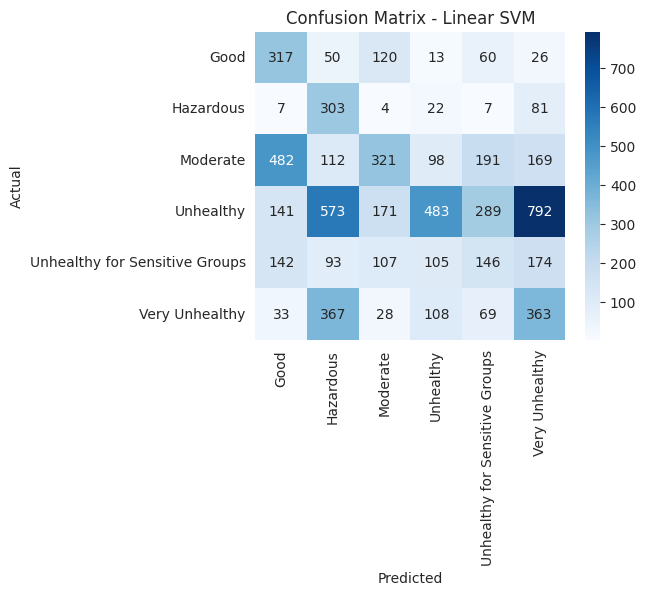

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Linear SVM
print("🔹 Linear SVM در حال اجراست...")
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {acc_linear:.4f}")

# رسم ماتریس درهم‌ریختگی
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=linear_svm.classes_, yticklabels=linear_svm.classes_)
plt.title('Confusion Matrix - Linear SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


🔹 Polynomial SVM در حال اجراست...
Polynomial SVM Accuracy: 0.4355


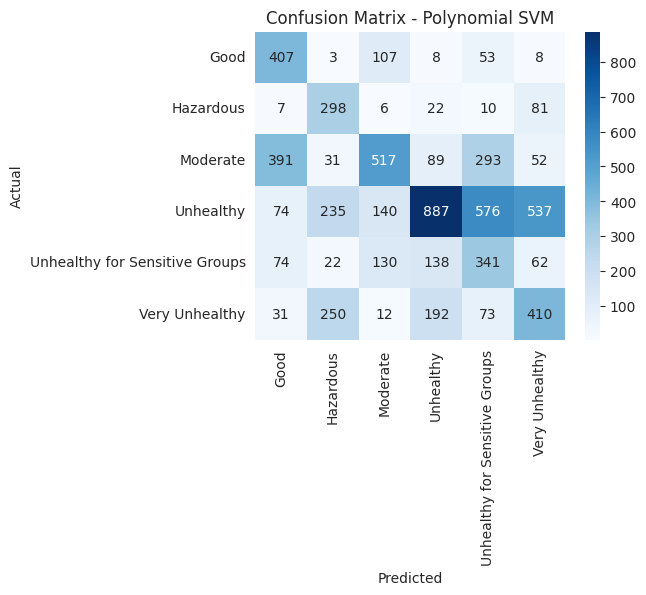

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Polynomial SVM
print("🔹 Polynomial SVM در حال اجراست...")
poly_svm = SVC(kernel='poly', degree=5, gamma='scale', C=1, coef0=1)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

acc_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial SVM Accuracy: {acc_poly:.4f}")

# رسم ماتریس درهم‌ریختگی
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_poly, annot=True, fmt='d', cmap='Blues',
            xticklabels=poly_svm.classes_, yticklabels=poly_svm.classes_)
plt.title('Confusion Matrix - Polynomial SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


🔹 RBF SVM در حال اجراست...
RBF SVM Accuracy: 0.3933


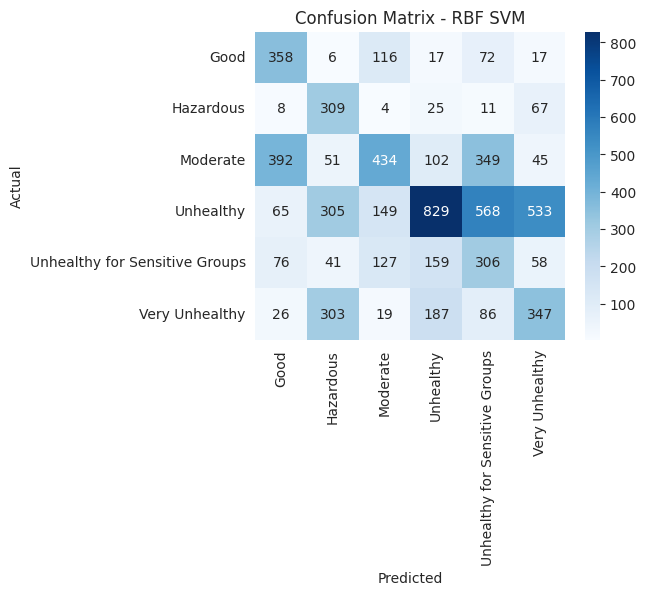

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns# RBF SVM
print("🔹 RBF SVM در حال اجراست...")
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {acc_rbf:.4f}")

# رسم ماتریس درهم‌ریختگی
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=rbf_svm.classes_, yticklabels=rbf_svm.classes_)
plt.title('Confusion Matrix - RBF SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


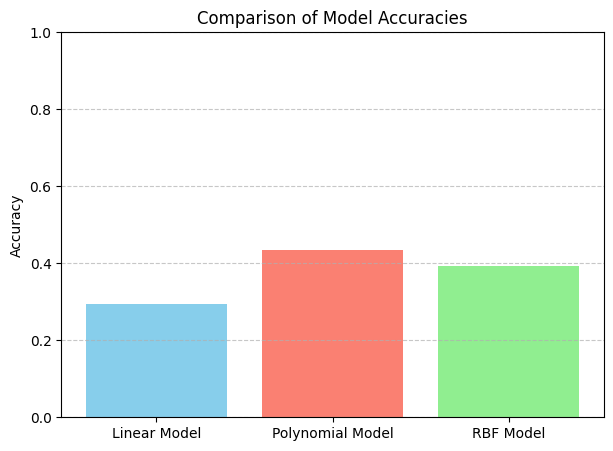

In [ ]:
import matplotlib.pyplot as plt

# Accuracies from the output of the three models
accuracies = [0.2944, 0.4355, 0.3933]
model_names = ['Linear Model', 'Polynomial Model', 'RBF Model']

# Plotting a bar chart
plt.figure(figsize=(7,5))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


قبل از SMOTE:
تعداد نمونه‌ها: 200
توزیع کلاس‌ها: Counter({'Unhealthy': 75, 'Moderate': 42, 'Very Unhealthy': 28, 'Unhealthy for Sensitive Groups': 24, 'Good': 17, 'Hazardous': 14})

بعد از SMOTE:
تعداد نمونه‌ها: 450
توزیع کلاس‌ها: Counter({'Hazardous': 75, 'Moderate': 75, 'Good': 75, 'Unhealthy for Sensitive Groups': 75, 'Very Unhealthy': 75, 'Unhealthy': 75})


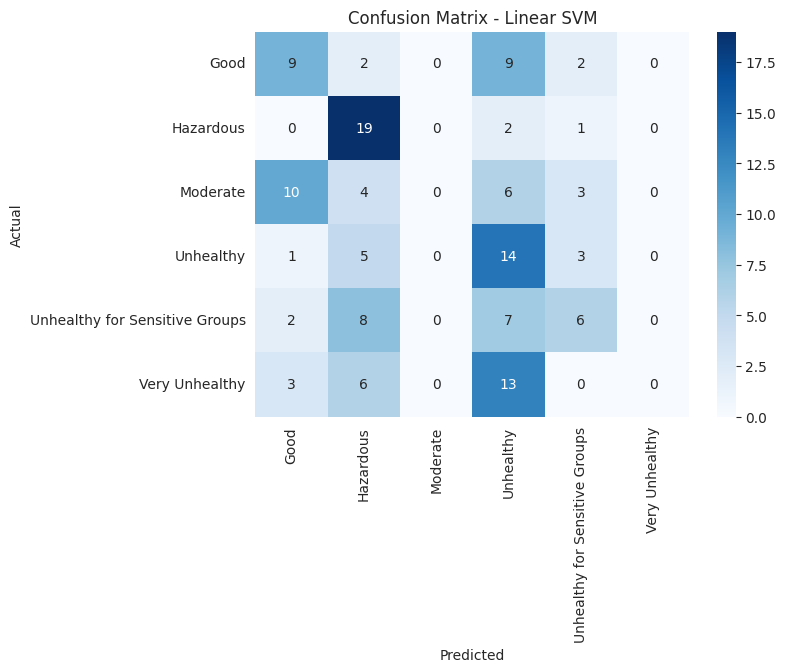

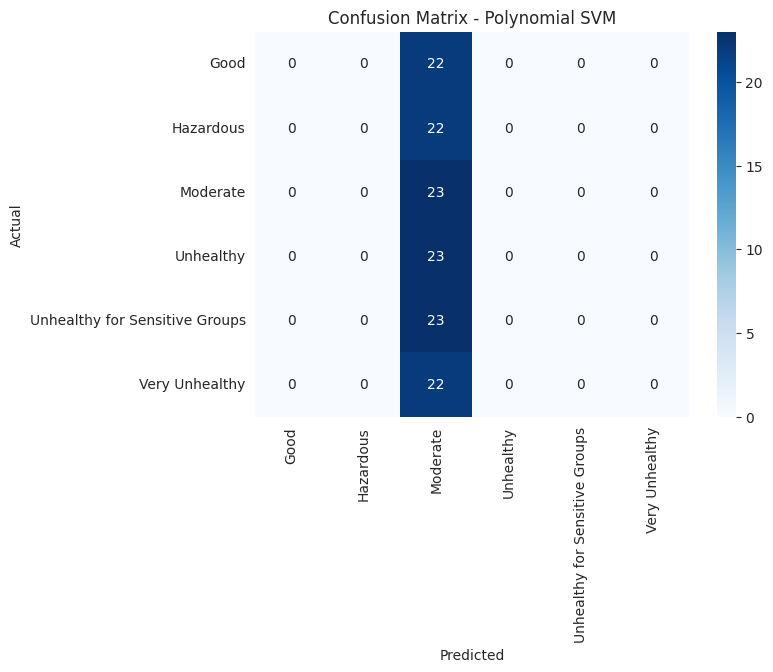

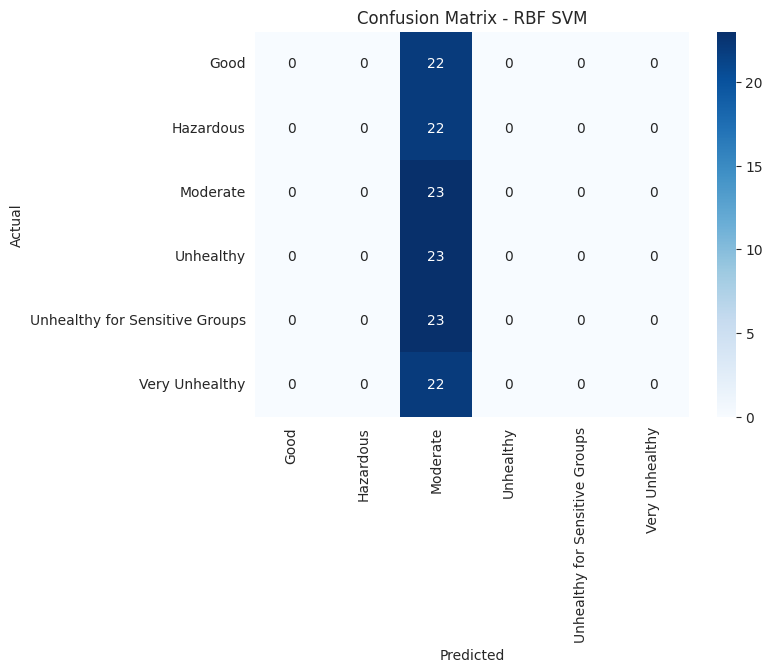


=== Results Comparison ===
Linear SVM Accuracy: 0.3556
Classification Report:
{'Good': {'precision': np.float64(0.36), 'recall': np.float64(0.4090909090909091), 'f1-score': np.float64(0.3829787234042554)}, 'Hazardous': {'precision': np.float64(0.4318181818181818), 'recall': np.float64(0.8636363636363636), 'f1-score': np.float64(0.5757575757575758)}, 'Moderate': {'precision': 0, 'recall': np.float64(0.0), 'f1-score': 0}, 'Unhealthy': {'precision': np.float64(0.27450980392156865), 'recall': np.float64(0.6086956521739131), 'f1-score': np.float64(0.37837837837837845)}, 'Unhealthy for Sensitive Groups': {'precision': np.float64(0.4), 'recall': np.float64(0.2608695652173913), 'f1-score': np.float64(0.31578947368421056)}, 'Very Unhealthy': {'precision': 0, 'recall': np.float64(0.0), 'f1-score': 0}}
Polynomial SVM Accuracy: 0.1704
Classification Report:
{'Good': {'precision': 0, 'recall': np.float64(0.0), 'f1-score': 0}, 'Hazardous': {'precision': 0, 'recall': np.float64(0.0), 'f1-score': 0},

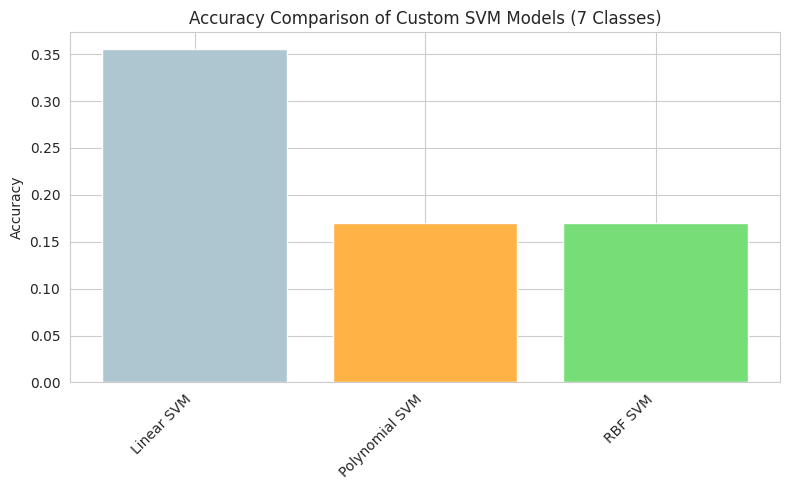

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# انتخاب نمونه‌های کوچک از کل داده
X_small, y_small = resample(X, y, n_samples=200, random_state=42, stratify=y)

print("قبل از SMOTE:")
print("تعداد نمونه‌ها:", len(y_small))
print("توزیع کلاس‌ها:", Counter(y_small))

# اعمال SMOTE برای تعادل کلاس‌ها
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_small, y_small)

print("\nبعد از SMOTE:")
print("تعداد نمونه‌ها:", len(y_balanced))
print("توزیع کلاس‌ها:", Counter(y_balanced))

# تبدیل به numpy برای جلوگیری از خطا
X_balanced = np.array(X_balanced)
y_balanced = np.array(y_balanced)

# ===============================
# تعریف کرنل‌ها و کلاس SVM سفارشی
# ===============================

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, degree=5, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

def rbf_kernel(x1, x2, gamma=0.1):
    diff = x1 - x2
    return np.exp(-gamma * np.dot(diff, diff))

class CustomSVM:
    def __init__(self, kernel='linear', C=1.0, degree=5, gamma=0.1, coef0=1, max_iter=1000, lr=0.001):
        self.kernel = kernel
        self.C = C
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.max_iter = max_iter
        self.lr = lr
        self.w = None
        self.b = None
        self.support_vectors_ = None

    def _kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return linear_kernel(x1, x2)
        elif self.kernel == 'poly':
            return polynomial_kernel(x1, x2, self.degree, self.coef0)
        elif self.kernel == 'rbf':
            return rbf_kernel(x1, x2, self.gamma)
        else:
            raise ValueError("Unknown kernel")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.support_vectors_ = []

        for _ in range(self.max_iter):
            for i in range(n_samples):
                margin = y[i] * (np.dot(self.w, X[i]) + self.b)
                if margin < 1:
                    self.w -= self.lr * (self.w - self.C * y[i] * X[i])
                    self.b -= self.lr * (-self.C * y[i])
                else:
                    self.w -= self.lr * self.w

        for i in range(n_samples):
            if abs(y[i] * (np.dot(self.w, X[i]) + self.b) - 1) < 1e-3:
                self.support_vectors_.append(X[i])
        self.support_vectors_ = np.array(self.support_vectors_)

    def predict_score(self, x):
        if self.kernel == 'linear':
            return np.dot(self.w, x) + self.b
        else:
            score = 0
            for sv, y_sv in zip(self.support_vectors_, self.y_sv):
                score += y_sv * self._kernel_function(sv, x)
            return score + self.b

    def fit_with_sv(self, X, y):
        self.y_sv = y
        self.fit(X, y)

class MultiClassSVM:
    def __init__(self, kernel='linear', C=1.0, degree=5, gamma=0.1, coef0=1, max_iter=1000, lr=0.001):
        self.kernel = kernel
        self.C = C
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.max_iter = max_iter
        self.lr = lr
        self.classifiers = []

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.classifiers = []

        for cls in self.classes_:
            y_binary = np.where(y == cls, 1, -1)
            svm = CustomSVM(
                kernel=self.kernel, C=self.C, degree=self.degree,
                gamma=self.gamma, coef0=self.coef0, max_iter=self.max_iter, lr=self.lr
            )
            svm.fit_with_sv(X, y_binary)
            self.classifiers.append(svm)

    def predict(self, X):
        n_samples = X.shape[0]
        scores = np.zeros((n_samples, len(self.classifiers)))
        for i, svm in enumerate(self.classifiers):
            for j in range(n_samples):
                scores[j, i] = svm.predict_score(X[j])

        return self.classes_[np.argmax(scores, axis=1)]

# =====================
# متریک‌ها
# =====================
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, labels):
    n_classes = len(labels)
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        t_idx = list(labels).index(t)
        p_idx = list(labels).index(p)
        cm[t_idx, p_idx] += 1
    return cm

def classification_report(y_true, y_pred, labels):
    report = {}
    for label in labels:
        tp = np.sum((y_true == label) & (y_pred == label))
        fp = np.sum((y_true != label) & (y_pred == label))
        fn = np.sum((y_true == label) & (y_pred != label))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        report[str(label)] = {'precision': precision, 'recall': recall, 'f1-score': f1}
    return report

# ============================
# آموزش و ارزیابی مدل‌ها
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

models = {
    'Linear SVM': MultiClassSVM(kernel='linear', C=1.0),
    'Polynomial SVM': MultiClassSVM(kernel='poly', degree=5, C=1.0, coef0=1),
    'RBF SVM': MultiClassSVM(kernel='rbf', gamma=0.1, C=1.0)
}

results = {}
labels = np.unique(y_balanced)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, labels)
    conf_matrix = confusion_matrix(y_test, y_pred, labels)

    results[name] = {
        'accuracy': acc,
        'report': report,
        'conf_matrix': conf_matrix
    }

    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("\n=== Results Comparison ===")
for name in results:
    print(f"{name} Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Classification Report:\n{results[name]['report']}")

accuracies = {name: results[name]['accuracy'] for name in results}
plt.figure(figsize=(8, 5))
pastel_colors = ['#AEC6CF', '#FFB347', '#77DD77', '#CBAACB', '#FFD1DC', '#BFD8B8']
plt.bar(accuracies.keys(), accuracies.values(), color=pastel_colors[:len(accuracies)])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Custom SVM Models (7 Classes)')
plt.tight_layout()
plt.show()


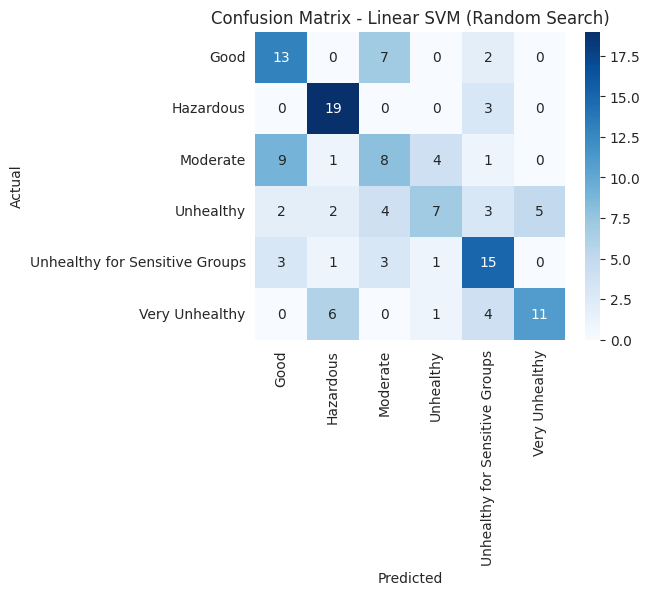

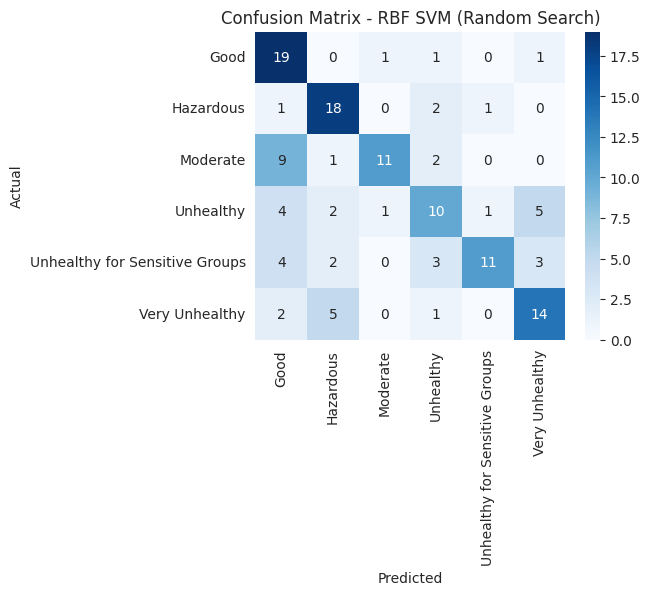

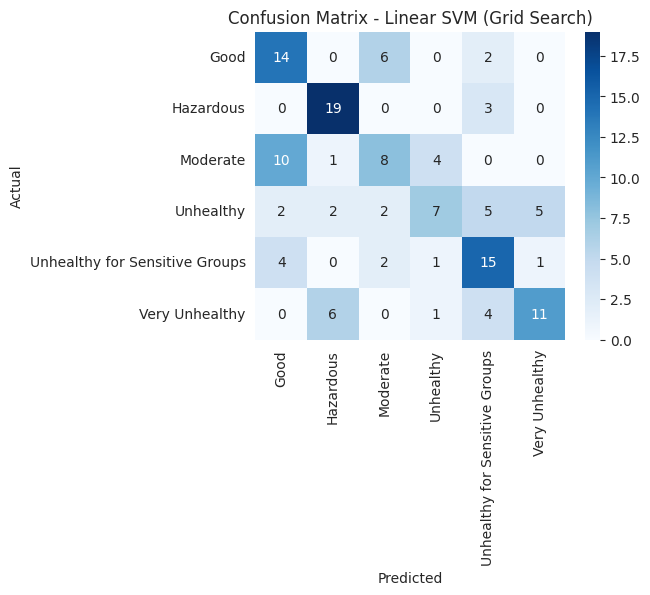

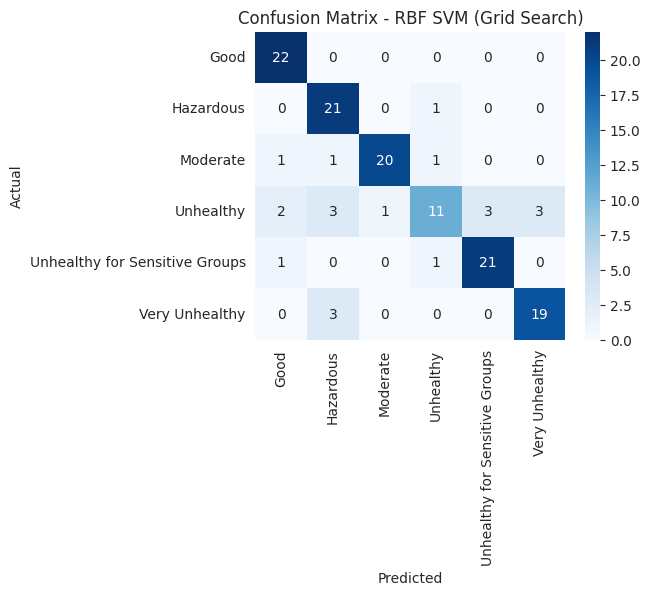


=== Results Comparison ===
Linear SVM Accuracy: 0.3556
Polynomial SVM Accuracy: 0.1704
RBF SVM Accuracy: 0.1704
Linear SVM (Random Search) Accuracy: 0.5407
Best Parameters: {'C': np.float64(157.41890047456639)}
RBF SVM (Random Search) Accuracy: 0.6148
Best Parameters: {'C': np.float64(0.1767016940294795), 'gamma': np.float64(5.669849511478847)}
Linear SVM (Grid Search) Accuracy: 0.5481
Best Parameters: {'C': 100}
RBF SVM (Grid Search) Accuracy: 0.8444
Best Parameters: {'C': 100, 'gamma': 1}


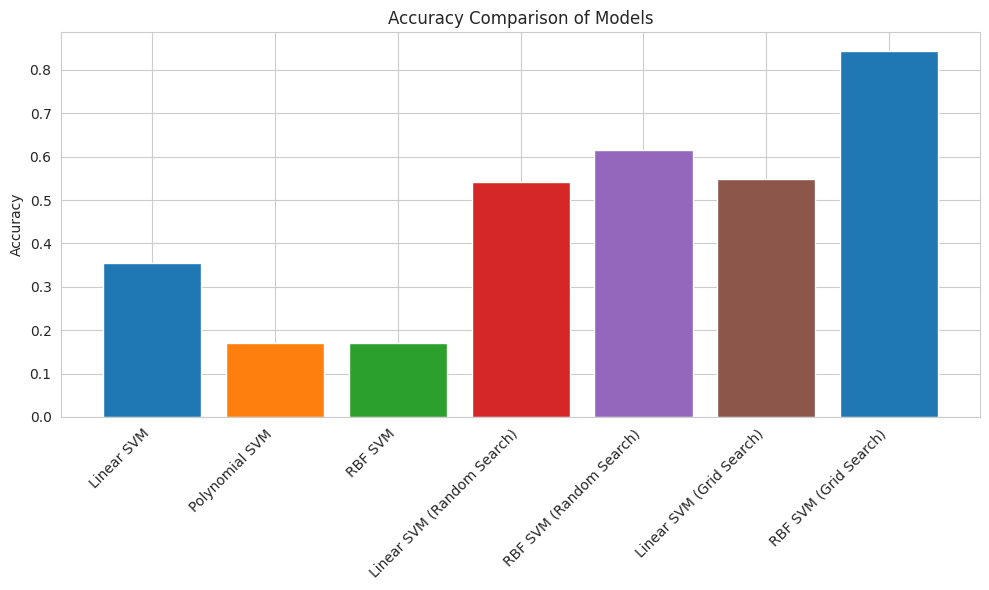

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import loguniform
from collections import Counter

# ========================
# پارامترهای جست‌وجوی تصادفی و گرید
# ========================

param_distributions = {
    'Linear SVM': {
        'C': loguniform(1e-3, 1e3)
    },
    'RBF SVM': {
        'C': loguniform(1e-3, 1e3),
        'gamma': loguniform(1e-4, 1e1)
    }
}

param_grid = {
    'Linear SVM': {
        'C': [0.1, 1, 10, 100]
    },
    'RBF SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    }
}

# ========================
# آموزش و ارزیابی با جست‌وجوی تصادفی و گرید
# ========================

search_results = {}

for name in ['Linear SVM', 'RBF SVM']:
    kernel_type = 'linear' if name == 'Linear SVM' else 'rbf'

    # جست‌وجوی تصادفی
    rand_search = RandomizedSearchCV(
        SVC(kernel=kernel_type),
        param_distributions[name],
        n_iter=10,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    rand_search.fit(X_train, y_train)

    best_model = rand_search.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    search_results[f'{name} (Random Search)'] = {
        'accuracy': acc,
        'report': report,
        'conf_matrix': conf_matrix,
        'best_params': rand_search.best_params_
    }

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.title(f'Confusion Matrix - {name} (Random Search)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for name in ['Linear SVM', 'RBF SVM']:
    kernel_type = 'linear' if name == 'Linear SVM' else 'rbf'

    # گرید سرچ
    grid_search = GridSearchCV(
        SVC(kernel=kernel_type),
        param_grid[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    search_results[f'{name} (Grid Search)'] = {
        'accuracy': acc,
        'report': report,
        'conf_matrix': conf_matrix,
        'best_params': grid_search.best_params_
    }

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.title(f'Confusion Matrix - {name} (Grid Search)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ========================
# مقایسه نهایی مدل‌ها
# ========================

print("\n=== Results Comparison ===")
for name in results:
    print(f"{name} Accuracy: {results[name]['accuracy']:.4f}")
for name in search_results:
    print(f"{name} Accuracy: {search_results[name]['accuracy']:.4f}")
    print(f"Best Parameters: {search_results[name]['best_params']}")

# نمودار مقایسه‌ای
accuracies = {name: results[name]['accuracy'] for name in results}
accuracies.update({name: search_results[name]['accuracy'] for name in search_results})

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(),
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.tight_layout()
plt.show()


=== Training without Preprocessing ===


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing

=== Training with StandardScaler ===


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing

=== Training with MinMaxScaler ===


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing


=== Loss Curves for No Preprocessing ===


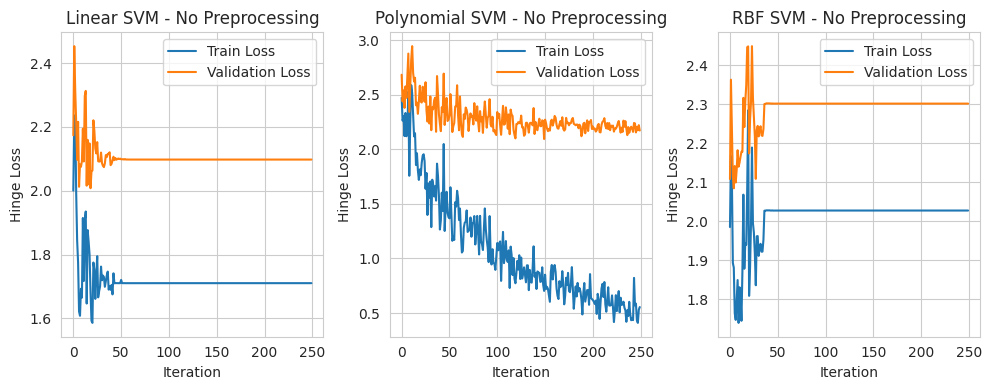


=== Loss Curves for StandardScaler ===


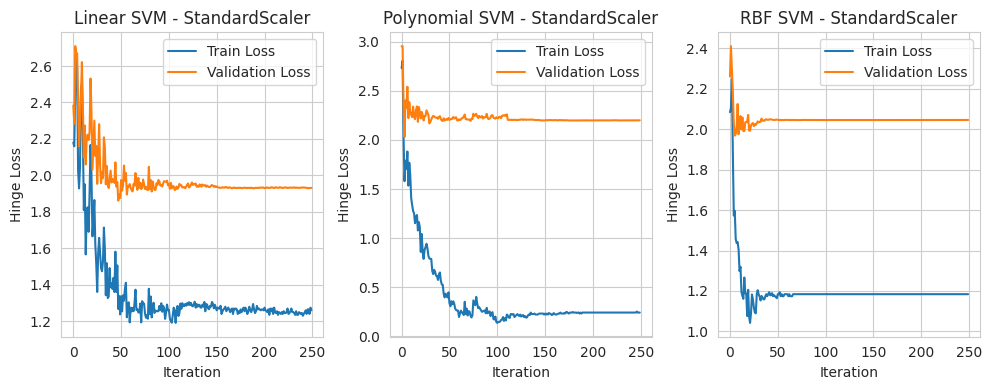


=== Loss Curves for MinMaxScaler ===


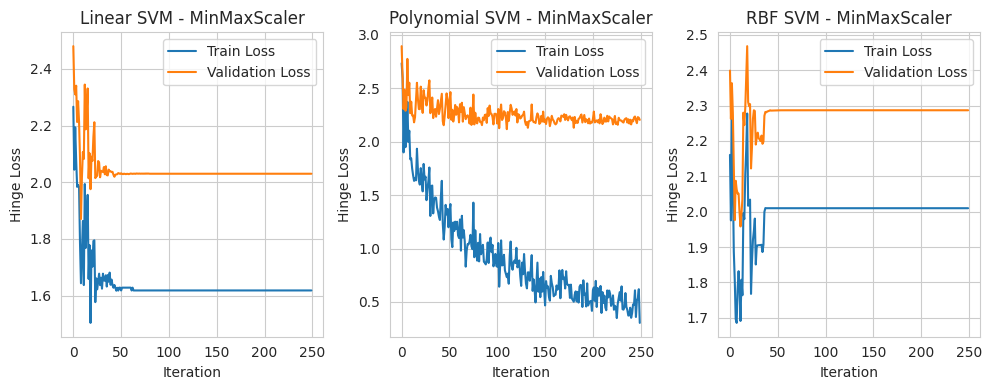

In [ ]:
from sklearn.metrics import hinge_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X_features = df_model_ready_scaled.drop(columns=['pm2.5', 'AQI_Category'])
y_labels = df_model_ready_scaled['AQI_Category']


def train_test_split_custom(X, y, train_size=200, random_seed=42):
    np.random.seed(random_seed)

    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    indices = np.random.permutation(len(X))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    return X[train_indices], y[train_indices], X[test_indices], y[test_indices]


X_train_custom, y_train_custom, X_test_custom, y_test_custom = train_test_split_custom(X_features, y_labels, train_size=200)

svm_models = {
    'Linear SVM': SVC(kernel='linear', C=1.0, max_iter=250),
    'Polynomial SVM': SVC(kernel='poly', degree=5, C=1.0, coef0=1, max_iter=250),
    'RBF SVM': SVC(kernel='rbf', gamma=0.1, C=1.0, max_iter=250)
}

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

loss_results = {
    'No Preprocessing': {},
    'StandardScaler': {},
    'MinMaxScaler': {}
}

def compute_losses(model, X_train, y_train, X_val, y_val, max_iter=250):
    train_losses, val_losses = [], []
    for i in range(1, max_iter + 1):
        model.set_params(max_iter=i)
        model.fit(X_train, y_train)

        train_pred = model.decision_function(X_train)
        val_pred = model.decision_function(X_val)
        train_loss = hinge_loss(y_train, train_pred)
        val_loss = hinge_loss(y_val, val_pred)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return train_losses, val_losses

print("=== Training without Preprocessing ===")
for name, model in svm_models.items():
    train_losses, val_losses = compute_losses(model, X_train_custom, y_train_custom, X_test_custom, y_test_custom)
    loss_results['No Preprocessing'][name] = {'train_losses': train_losses, 'val_losses': val_losses}

X_train_std = scaler_std.fit_transform(X_train_custom)
X_test_std = scaler_std.transform(X_test_custom)
print("=== Training with StandardScaler ===")
for name, model in svm_models.items():
    train_losses, val_losses = compute_losses(model, X_train_std, y_train_custom, X_test_std, y_test_custom)
    loss_results['StandardScaler'][name] = {'train_losses': train_losses, 'val_losses': val_losses}

X_train_mm = scaler_minmax.fit_transform(X_train_custom)
X_test_mm = scaler_minmax.transform(X_test_custom)
print("=== Training with MinMaxScaler ===")
for name, model in svm_models.items():
    train_losses, val_losses = compute_losses(model, X_train_mm, y_train_custom, X_test_mm, y_test_custom)
    loss_results['MinMaxScaler'][name] = {'train_losses': train_losses, 'val_losses': val_losses}

for preprocessing in loss_results:
    print(f"\n=== Loss Curves for {preprocessing} ===")
    plt.figure(figsize=(10, 4))
    for i, (name, result) in enumerate(loss_results[preprocessing].items(), 1):
        plt.subplot(1, 3, i)
        plt.plot(result['train_losses'], label='Train Loss', color='#1f77b4')
        plt.plot(result['val_losses'], label='Validation Loss', color='#ff7f0e')
        plt.title(f'{name} - {preprocessing}')
        plt.xlabel('Iteration')
        plt.ylabel('Hinge Loss')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()


##1.2.13

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1jTkHI5Fr0EO3r0OqDoxoGystT8oLP7fP

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. بارگذاری داده
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

# 2. حذف مقادیر گمشده
df_clean = df.dropna(subset=["pm2.5"]).copy()

# 3. ساخت datetime و دسته‌بندی PM2.5
df_clean["datetime"] = pd.to_datetime(df_clean[["year", "month", "day", "hour"]])
bins = [-np.inf, 35, 75, 115, 150, 250, np.inf]
labels = ["Good", "Moderate", "Unhealthy-Sensitive", "Unhealthy", "Very Unhealthy", "Hazardous"]
df_clean["PM2.5_Category"] = pd.cut(df_clean["pm2.5"], bins=bins, labels=labels)

# 4. بالانس دسته‌بندی‌ها
min_count = df_clean["PM2.5_Category"].value_counts().min()
balanced_df = pd.concat([
    resample(df_clean[df_clean["PM2.5_Category"] == cat],
             replace=False, n_samples=min_count, random_state=42)
    for cat in df_clean["PM2.5_Category"].unique()
])

# 5. انتخاب ویژگی‌ها و هدف
features = ["DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
X = balanced_df[features]
y = balanced_df["pm2.5"]

# 6. نرمال‌سازی X و y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# 7. تقسیم به train / val / test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 8. تعریف و آموزش مدل
model = SVR(kernel='linear', C=1.0, epsilon=0.1, max_iter=500)
model.fit(X_train, y_train)

# 9. پیش‌بینی روی val و test
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# 10. بازگردانی مقادیر واقعی
y_val_true = scaler_y.inverse_transform(y_val.reshape(-1, 1)).ravel()
y_val_pred = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).ravel()
y_test_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

# 11. ارزیابی
val_mse = mean_squared_error(y_val_true, y_val_pred)
test_mse = mean_squared_error(y_test_true, y_test_pred)
test_r2 = r2_score(y_test_true, y_test_pred)

# 12. نمایش نتایج
print("✅ نتایج مدل Linear SVR:")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R²: {test_r2:.4f}")


Downloading...
From: https://drive.google.com/uc?id=1jTkHI5Fr0EO3r0OqDoxoGystT8oLP7fP
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100% 2.01M/2.01M [00:00<00:00, 186MB/s]
✅ نتایج مدل Linear SVR:
Validation MSE: 12473.1485
Test MSE: 12405.2943
Test R²: -0.0157


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


##1.2.15

In [ ]:

!pip install pyswarms
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from pyswarms.single.global_best import GlobalBestPSO

# بارگذاری و تمیزسازی داده
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
df_clean = df.dropna(subset=["pm2.5"]).copy()

# انتخاب ویژگی‌ها و هدف
features = ["DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
X = df_clean[features]
y = df_clean["pm2.5"]

# نمونه‌گیری برای سرعت بیشتر
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=3000, random_state=42)

# نرمال‌سازی
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_sample)

# تابع هدف برای PSO (کمینه‌سازی RMSE)
def objective_function(params):
    n_particles = params.shape[0]
    scores = []
    for i in range(n_particles):
        C = params[i, 0]
        gamma = params[i, 1]
        epsilon = params[i, 2]
        model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
        rmse = -1 * cross_val_score(model, X_scaled, y_sample, cv=3, scoring="neg_root_mean_squared_error").mean()
        scores.append(rmse)
    return np.array(scores)

# محدوده جستجو برای پارامترهای C, gamma, epsilon
bounds = ([0.1, 0.0001, 0.01], [100, 1, 1])

# اجرای PSO
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

# نمایش نتایج
print("✅ Best Parameters Found:")
print("C:", best_pos[0])
print("gamma:", best_pos[1])
print("epsilon:", best_pos[2])
print("Best RMSE:", best_cost)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.3 MB/s eta 0:00:00


2025-06-09 17:11:42,893 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=77.4
2025-06-09 17:16:13,750 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 77.41647627472805, best pos: [81.04126013  0.99430893  0.40126255]


✅ Best Parameters Found:
C: 81.04126013299695
gamma: 0.9943089308855513
epsilon: 0.4012625537048098
Best RMSE: 77.41647627472805


In [ ]:
# ادامه از بهینه‌سازی PSO برای SVR

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# استفاده از پارامترهای بهینه‌شده (خروجی PSO)
C_best = best_pos[0]
gamma_best = best_pos[1]
epsilon_best = best_pos[2]

# تقسیم داده به آموزش و آزمون با همان داده‌های نرمال‌شده
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sample, test_size=0.3, random_state=42)

# ساخت و آموزش مدل SVR با هسته RBF و پارامترهای بهینه
model_pso = SVR(kernel='rbf', C=C_best, gamma=gamma_best, epsilon=epsilon_best)
model_pso.fit(X_train, y_train)

# پیش‌بینی روی داده تست
y_pred = model_pso.predict(X_test)

# ارزیابی عملکرد مدل
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# چاپ نتایج نهایی
print("✅ ارزیابی مدل نهایی بهینه‌شده با PSO:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


✅ ارزیابی مدل نهایی بهینه‌شده با PSO:
MAE: 48.91
RMSE: 70.17
R² Score: 0.287
